# Visualisations
This notebook will showcase some plots done to gain insights in the data we are working with.

Author: lkt259@alumni.ku.dk

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import pickle
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

#### LDA Topic Coherences
Let's look at how well the topics are represented.

In [2]:
coherences = [[(8, 0.6117312626721536), (9, 0.6106238642051569), (10, 0.6179666989176474), (11, 0.6250058243446092), (12, 0.6111042124146954), (13, 0.619469020571763), (14, 0.6222121415548291), (15, 0.5843590899305254), (16, 0.6110365054921714), (17, 0.6256605542300897), (18, 0.6064149205850664), (19, 0.6223064588123307), (20, 0.5778775381907882), (21, 0.5863032045273041), (22, 0.5938667148708359), (23, 0.5961460076713366), (24, 0.6160691245246422), (25, 0.5937059440285355), (26, 0.6003814517537738), (27, 0.6126466078224517), (28, 0.5973929639227155), (29, 0.62515256360405), (30, 0.6061354200515153), (31, 0.6139392700432957), (32, 0.6213132787363511), (33, 0.609842900789838), (34, 0.610803276483773), (35, 0.6154936776293224), (36, 0.6295948900380374), (37, 0.5913506943733441), (38, 0.5899376960141458), (39, 0.5856010774067592), (40, 0.580387831300977), (41, 0.6117635355968066), (42, 0.57589468547347), (43, 0.5859371951056254), (44, 0.5985872088039745), (45, 0.6264381339268187), (46, 0.5771072227762349), (47, 0.6022566021544365), (48, 0.5849982155937422), (49, 0.5755931557535674)],
[(8, 0.6081867689926476), (9, 0.6205054695006278), (10, 0.6331616078153826), (11, 0.6254176150074696), (12, 0.6067191128367824), (13, 0.6082471540841474), (14, 0.5919291135951904), (15, 0.6108404560931749), (16, 0.6073825864432809), (17, 0.5960947217670309), (18, 0.6212017748660447), (19, 0.6057948587975367), (20, 0.6268136049144576), (21, 0.6231488869817381), (22, 0.6033836263347845), (23, 0.5915796250000085), (24, 0.6268383048550978), (25, 0.5963923968859608), (26, 0.6184162713261332), (27, 0.613734343075488), (28, 0.6056043831989808), (29, 0.6149300316295734), (30, 0.5903096619959898), (31, 0.5990571207062133), (32, 0.6317628503510441), (33, 0.6111056930977398), (34, 0.6032050683131244), (35, 0.6169413278722601), (36, 0.6083494728448767), (37, 0.6007596967190834), (38, 0.6041611590487039), (39, 0.6188798930594341), (40, 0.5642813589626055), (41, 0.6135209918749587), (42, 0.6102037924861892), (43, 0.6029482862463514), (44, 0.5843783379694117), (45, 0.5854506722858269), (46, 0.6051147611856587), (47, 0.5994546142656753), (48, 0.584815923264219), (49, 0.6042946977540277)],
[(8, 0.5960489596866325), (9, 0.6041479701488429), (10, 0.6127684188441596), (11, 0.6218418073365691), (12, 0.6193701861371658), (13, 0.6171612719571935), (14, 0.6038946814574546), (15, 0.602033873134156), (16, 0.58735470185799), (17, 0.6249930808987113), (18, 0.6207112068396428), (19, 0.5995294610419544), (20, 0.6328701757850569), (21, 0.6104698328059749), (22, 0.6121616362526261), (23, 0.6346951002542699), (24, 0.6255226743245387), (25, 0.6026884691270191), (26, 0.6017337475077146), (27, 0.597710785486341), (28, 0.6113954574597381), (29, 0.5978006572925696), (30, 0.5865206381860869), (31, 0.6271970576913041), (32, 0.5901784844135738), (33, 0.5803304747321063), (34, 0.60574788003527), (35, 0.6085145533834398), (36, 0.6163923818907692), (37, 0.6146596616512872), (38, 0.593618293433766), (39, 0.5989459604849031), (40, 0.6040126138172498), (41, 0.6037158106239919), (42, 0.6253719639754459), (43, 0.5924721369087063), (44, 0.6194049705558069), (45, 0.5847115075536785), (46, 0.6057718825233712), (47, 0.5916048977546826), (48, 0.6201676874124046), (49, 0.5945185149971308)],
[(8, 0.6078173373943779), (9, 0.5861782901000842), (10, 0.6277064497625479), (11, 0.5983870104619426), (12, 0.6083707720892221), (13, 0.6264550240213568), (14, 0.6258504298518016), (15, 0.6166137613534536), (16, 0.5899227888763272), (17, 0.6058992691589575), (18, 0.6148368472138616), (19, 0.629351753635674), (20, 0.6114089614763348), (21, 0.5985664626754658), (22, 0.6179223495659094), (23, 0.614090047026296), (24, 0.6253213236877391), (25, 0.596544369770676), (26, 0.6238251087667351), (27, 0.6343861202292642), (28, 0.6160253724800674), (29, 0.5988208307191403), (30, 0.5947291113369689), (31, 0.6068574750919704), (32, 0.6111248702648806), (33, 0.597551368312977), (34, 0.6016020974816959), (35, 0.6115022682104515), (36, 0.6230484762811198), (37, 0.5884340992351497), (38, 0.6234194411855537), (39, 0.5992536123190288), (40, 0.587192170661122), (41, 0.5899422761884944), (42, 0.5912785530185881), (43, 0.6107743896315518), (44, 0.5742977958186705), (45, 0.5966216947961123), (46, 0.579510769952945), (47, 0.5818350568058215), (48, 0.587842559157552), (49, 0.5715302212660975)]]

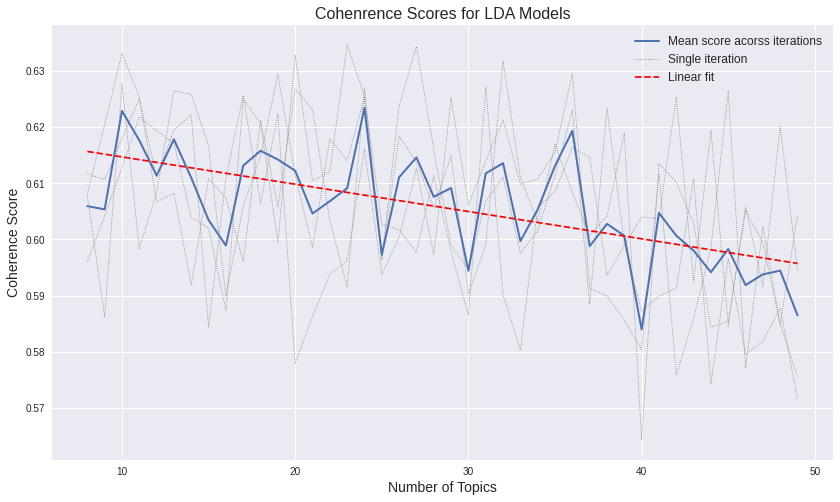

In [3]:
topics = [x[0] for x in coherences[0]]
score0 = [x[1] for x in coherences[0]]
score1 = [x[1] for x in coherences[1]]
score2 = [x[1] for x in coherences[2]]
score3 = [x[1] for x in coherences[3]]

mean = np.mean((score0, score1, score2, score3), axis=0)
slope, intercept = np.polyfit(topics, mean, deg=1)

fig, ax = plt.subplots(1, figsize=(14,8))
plt.plot(topics, mean, linewidth=2, zorder=8, label="Mean score acorss iterations")
plt.plot(topics, score0, linewidth=0.8, linestyle='dotted', c='grey', label="Single iteration")
plt.plot(topics, score1, linewidth=0.8, linestyle='dotted', c='grey')
plt.plot(topics, score2, linewidth=0.8, linestyle='dotted', c='grey')
plt.plot(topics, score3, linewidth=0.8, linestyle='dotted', c='grey')

y_vals = intercept + slope * np.array(topics)
plt.plot(topics, y_vals, '--', c='red', zorder=10, label="Linear fit")

plt.title("Cohenrence Scores for LDA Models", fontsize=16)
plt.xlabel("Number of Topics", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.legend(fontsize=12)
# 70 HOURS

#### Feature Importances
Here, we will deal with feature importances both for scalar and vector features.

In [ ]:
domain_feature_names = np.load('Data/additional/xtra_features_domain_v2/feature_names.npy', allow_pickle=True)
with open('Classification results/Random_Forest/xtra_NA_manual_RF_classsification.dat', 'rb') as f:
    domain_model_output = pickle.load(f)

author_feature_names = np.load('Data/additional/xtra_features_author_v2/feature_names.npy', allow_pickle=True)
with open('Classification results/Random_Forest/xtra_AA_manual_RF_classsification.dat', 'rb') as f:
    author_model_output = pickle.load(f)

In [ ]:
domain_feature_importances = domain_model_output['fedtet_estimator'].feature_importances_
author_feature_importances = author_model_output['fedtet_estimator'].feature_importances_

In [ ]:
def create_importances_dict(feature_names, feature_importances):
    importances = dict.fromkeys(np.unique(feature_names))
    for feature in importances:
        importances[feature] = feature_importances[feature_names==feature]
        if len(importances[feature]) == 1:
            importances[feature] = importances[feature][0]

    sum_importances = importances.copy()
    vector_importances = dict()
    scalar_importances = dict()
    for key in sum_importances.keys():
        if not isinstance(sum_importances[key], np.ndarray):
            scalar_importances[key] = sum_importances[key]
            continue
        sum_importances[key] = sum_importances[key].sum()
        vector_importances[key] = sum_importances[key]
        
    return importances, sum_importances, vector_importances, scalar_importances

domain_importances, domain_sum_importances, domain_vector_importances, domain_scalar_importances = create_importances_dict(domain_feature_names, domain_feature_importances)
author_importances, author_sum_importances, author_vector_importances, author_scalar_importances = create_importances_dict(author_feature_names, author_feature_importances)

In [ ]:
fig, ax = plt.subplots(1, figsize=(14,8))
marklist = sorted(domain_sum_importances.items(), key=lambda x:x[1])
domain_sum_importances = dict(marklist)
plt.plot(domain_sum_importances.keys(), domain_sum_importances.values(), label="Domains")
plt.plot(domain_sum_importances.keys(), [author_sum_importances[x] for x in domain_sum_importances.keys()], '--', label="Authors")

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right', family='Courier New', fontweight="bold")
plt.tight_layout();
plt.tick_params(axis='both', which='both', length=5, direction='inout')
plt.title("Feature Importances\nVector Features Represented by Sum of Vector", fontsize=16)
plt.xlabel("Feature Name", fontsize=14)
plt.ylabel("Feature Importance", fontsize=14)

domain_percent_vectors = sum(domain_vector_importances.values())
domain_percent_scalars = sum(domain_scalar_importances.values())
author_percent_vectors = sum(author_vector_importances.values())
author_percent_scalars = sum(author_scalar_importances.values())

desc = f"Division of Importance:\nDomain scalar features:\t{domain_percent_scalars:.2f}%\t\tAuthor scalar features:\t{author_percent_scalars:.2f}%\nDomain vector features:\t{domain_percent_vectors:.2f}%\t\tAuthor vector features:\t{author_percent_vectors:.2f}%".expandtabs()
plt.text(0.02, 0.9, desc, horizontalalignment='left',verticalalignment='center', transform=ax.transAxes, fontsize=16);
plt.legend(bbox_to_anchor=(1, 1), prop={'size':15})
plt.tight_layout()
plt.savefig('figs/all_feature_importances.png')

findfont: Font family ['Courier New'] not found. Falling back to DejaVu Sans.

KeyboardInterrupt



Error in callback <function flush_figures at 0x7f472568baf0> (for post_execute):


In [ ]:
def plot_scalar_importances(scalar_importances, scalar_importances2):
    fig, ax = plt.subplots(1, figsize=(14,8))
    marklist = sorted(scalar_importances.items(), key=lambda x:x[1])
    scalar_importances = dict(marklist)
    plt.plot(scalar_importances.keys(), scalar_importances.values(), label="Domains")
    plt.plot(scalar_importances.keys(), [scalar_importances2[x] for x in scalar_importances.keys()], '--', label="Authors")
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right', family='Courier New', fontweight="bold")
    plt.tight_layout();
    plt.tick_params(axis='both', which='both', length=5, direction='inout')
    plt.title("Scalar Feature Importances", fontsize=16)
    plt.xlabel("Feature Name", fontsize=14)
    plt.ylabel("Feature Importance", fontsize=14)
    plt.legend(prop={'size':15})
    plt.tight_layout()
    plt.savefig('figs/scalar_importances.png')

plot_scalar_importances(domain_scalar_importances, author_scalar_importances)

ERROR! Session/line number was not unique in database. History logging moved to new session 4



KeyboardInterrupt



Error in callback <function flush_figures at 0x7f472568baf0> (for post_execute):



KeyboardInterrupt



In [ ]:
def plot_vector_importances(vector_importances, vector_importances2):
    fig, ax = plt.subplots(1, figsize=(14,8))
    marklist = sorted(vector_importances.items(), key=lambda x:x[1])
    vector_importances = dict(marklist)
    plt.plot(vector_importances.keys(), vector_importances.values(), label='Domains')
    plt.plot(vector_importances.keys(), [vector_importances2[x] for x in vector_importances.keys()], '--', label="Authors")
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right', family='Courier New', fontweight="bold")
    plt.tight_layout();
    plt.tick_params(axis='both', which='both', length=5, direction='inout')
    plt.title("Vector Feature Importances", fontsize=16)
    plt.xlabel("Feature Name", fontsize=14)
    plt.ylabel("Feature Importance", fontsize=14)
    plt.legend(prop={'size':15})
    plt.tight_layout()
    plt.savefig('figs/vector_importances.png')

plot_vector_importances(domain_vector_importances, author_vector_importances)

#### The distribution of importances for the top 3 feature vectors
Assumes the previous cells have run.

In [ ]:
#Make warnings shut up
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import seaborn as sns

def plot_kde(importances, vector_importances, xlim, task):
    fig, ax = plt.subplots(1, figsize=(14,8))
    top_vector_names = sorted(vector_importances.items(), key=lambda x:x[1])[-3:]
    top_vector_names = [x[0] for x in top_vector_names]
    sns.kdeplot(importances[top_vector_names[-1]], gridsize=800, label=top_vector_names[-1]);
    sns.kdeplot(importances[top_vector_names[-2]], gridsize=800, label=top_vector_names[-2]);
    sns.kdeplot(importances[top_vector_names[-3]], gridsize=800, label=top_vector_names[-3]);
    
    
    plt.legend(fontsize=14)
    plt.ylabel("Density", fontsize="14")
    plt.xlabel("Importance Score", fontsize=14)
    plt.title(f"Kernel Density Estimates for the Top 3 {task} Feature Vectors", fontsize=16)
    plt.xlim(xlim)
    plt.tight_layout()

plot_kde(domain_importances, domain_vector_importances, [-0.0002,0.0008], "Domain")
plt.savefig('figs/domain_best_vectors.png')
plot_kde(author_importances, author_vector_importances, [-0.0002,0.0008], "Author")
plt.savefig('figs/author_best_vectors.png')

In [ ]:
fig, ax = plt.subplots(1, figsize=(14,8))
top_vector_names = sorted(domain_vector_importances.items(), key=lambda x:x[1])
top_vector_names = [x[0] for x in top_vector_names]
sns.kdeplot(domain_importances[top_vector_names[0]], gridsize=700, label=f"{top_vector_names[0]} (Domain)");
sns.kdeplot(author_importances[top_vector_names[0]], gridsize=700, label=f"{top_vector_names[0]} (Author)");
sns.kdeplot(domain_importances[top_vector_names[-1]], linestyle='dotted', gridsize=700, label=f"{top_vector_names[-1]} (Domain)");
plt.legend(prop={'size':20}, fontsize=14)
plt.ylabel("Density", fontsize=16)
plt.xlabel("Importance Score", fontsize=16)
plt.title("Kernel Density Estimates for the Least Useful Vector Features\nCompared to Best Domain Feature", fontsize=20)
plt.xlim([-0.0006,0.0024])
plt.tight_layout()
plt.savefig('figs/worst_vectors.png')

In [ ]:
fig, ax = plt.subplots(1, figsize=(14,8))
top_vector_names = sorted(domain_vector_importances.items(), key=lambda x:x[1])
top_vector_names = [x[0] for x in top_vector_names]
plt.hist(domain_importances[top_vector_names[0]], alpha=0.6, bins=70, label=f"{top_vector_names[0]} (Domain)");
plt.hist(author_importances[top_vector_names[0]], alpha=0.6, bins=70, label=f"{top_vector_names[0]} (Author)");
plt.hist(domain_importances[top_vector_names[-1]], alpha=0.6, bins=70, label=f"{top_vector_names[-1]} (Domain)");
plt.legend(prop={'size':20}, fontsize=14)
plt.ylabel("Density", fontsize=16)
plt.xlabel("Importance Score", fontsize=16)
plt.title("Histogram Over the Least Useful Vector Features\nCompared to Best Domain Feature", fontsize=20)
plt.xlim([-0.0001,0.0026])
plt.tight_layout()
plt.savefig('figs/worst_vectors_hist.png')

# Confusion Matrix
Confusion matrix plots

In [ ]:
X = np.load('Data/additional/xtra_features_domain_v2/testX.npy', allow_pickle=True)[()]
y = np.load('Data/additional/xtra_features_domain_v2/testY.npy', allow_pickle=True)[()]
X = X.toarray()
X = np.nan_to_num(X)
outputs = domain_output

In [ ]:
with open('Data/additional/xtra_features_domain_v2/label_to_index.dat', 'rb') as f:
    str2y = pickle.load(f)
with open('Data/additional/xtra_features_domain_v2/index_to_label.dat', 'rb') as f:
    y2str = pickle.load(f)
labels = [y2str[str(x)] for x in tqdm(list(set(y)))]

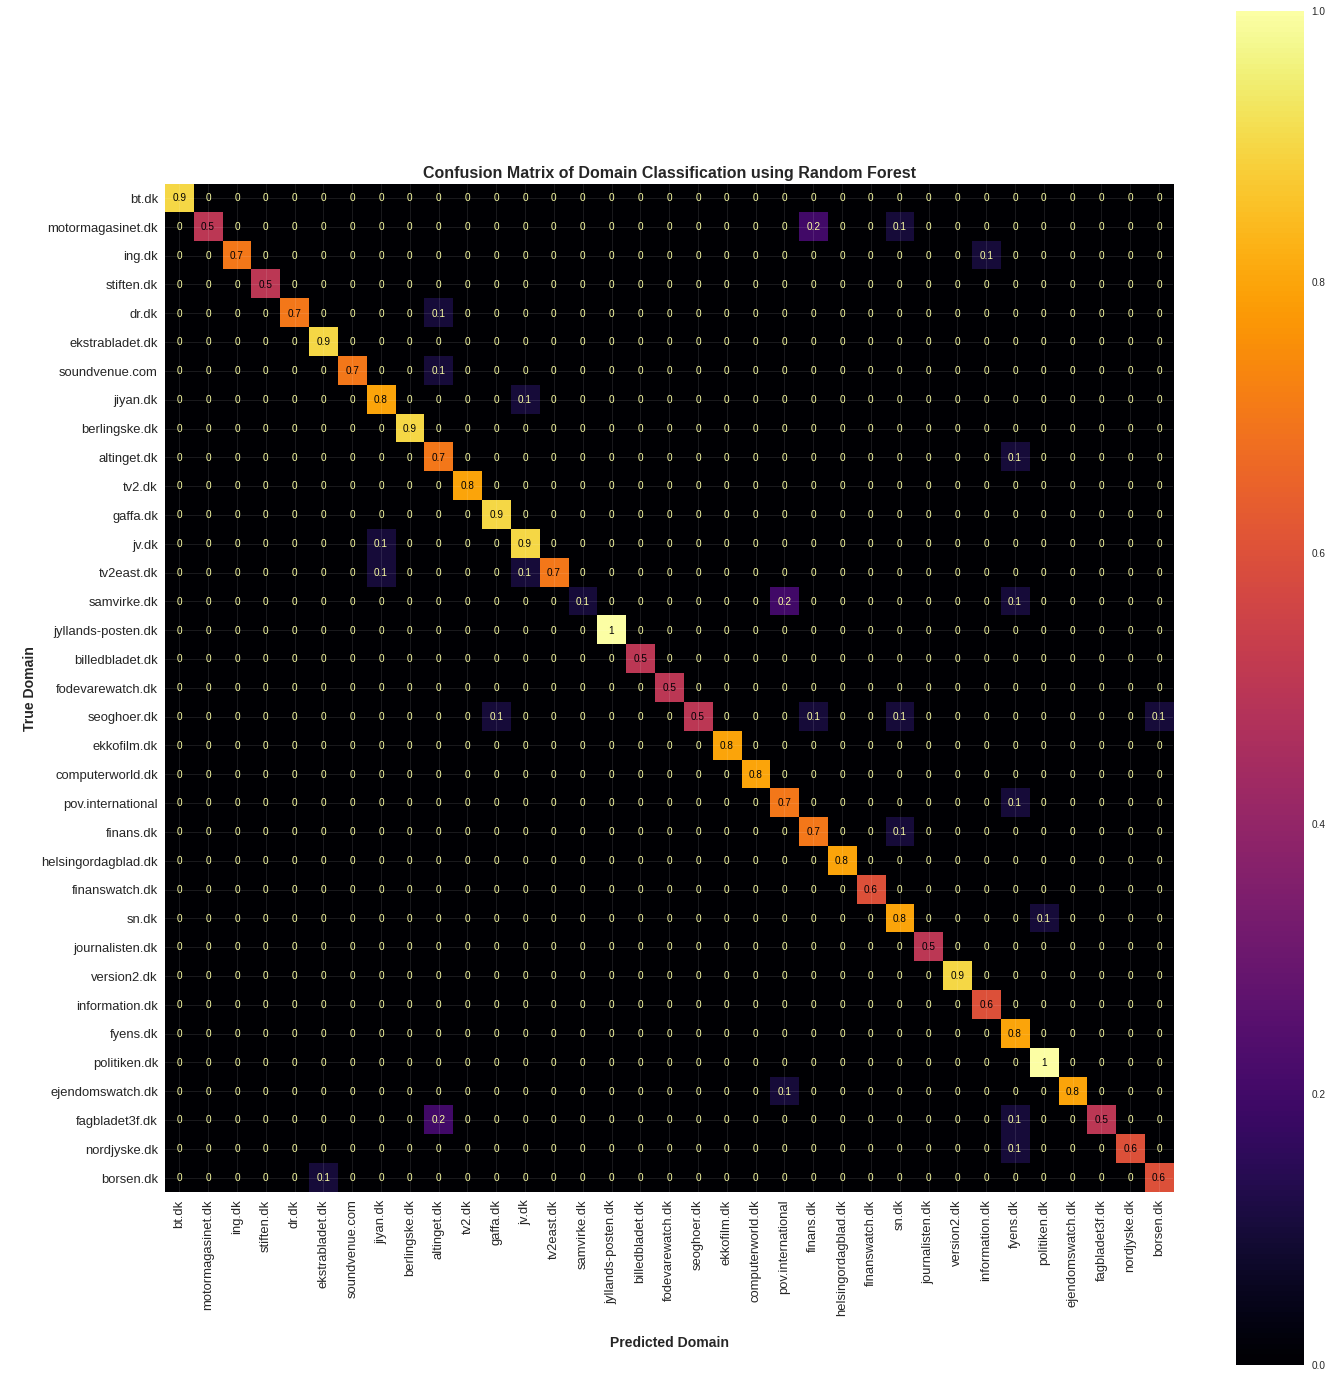

In [ ]:
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay

def format_cnf_matrix(cnf_matrix):
    cnf_matrix = cnf_matrix / cnf_matrix.astype(np.float).sum(axis=1)
    return cnf_matrix

fig, ax = plt.subplots(1, figsize=(20,20))
format_cnf = format_cnf_matrix(outputs['cnf_matrix']).round(decimals=1)
cnf = ConfusionMatrixDisplay(confusion_matrix=format_cnf, display_labels=labels)
cnf.plot(ax=ax, xticks_rotation='vertical', cmap='inferno')
ax.grid(alpha=0.1)
ax.set_xlabel('\nPredicted Domain', fontweight='bold', fontsize=14);
ax.set_ylabel('\nTrue Domain', fontweight='bold', fontsize=14);
ax.set_title("Confusion Matrix of Domain Classification using Random Forest", fontweight='bold', fontsize=16);
ax.tick_params(axis='both', which='major', labelsize=13)
plt.tight_layout()
plt.savefig('figs/Domain_cnf.png')

### Make Confusion Matrix for Authors
We need to subsample the authors, there are too many.

In [ ]:
X = np.load('Data/additional/xtra_features_author_v2/testX.npy', allow_pickle=True)[()]
y = np.load('Data/additional/xtra_features_author_v2/testY.npy', allow_pickle=True)[()]
X = X.toarray()
X = np.nan_to_num(X)
outputs = author_model_output

with open('Data/additional/xtra_features_author_v2/label_to_index.dat', 'rb') as f:
    a_str2y = pickle.load(f)
with open('Data/additional/xtra_features_author_v2/index_to_label.dat', 'rb') as f:
    a_y2str = pickle.load(f)
a_labels = [a_y2str[str(x)] for x in tqdm(list(set(y)))] 

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,20))
format_cnf = format_cnf_matrix(outputs['cnf_matrix'][:33, :33]).round(decimals=1)
cnf = ConfusionMatrixDisplay(confusion_matrix=format_cnf, display_labels=a_labels[:33])
cnf.plot(ax=ax, xticks_rotation='vertical', cmap='inferno')
ax.grid(alpha=0.1)
ax.set_xlabel('\nPredicted Author', fontweight='bold', fontsize=14);
ax.set_ylabel('\nTrue Author', fontweight='bold', fontsize=14);
ax.set_title("Confusion Matrix of Authorship Attribution using Random Forest\nFirst 33 Authors", fontweight='bold', fontsize=16);
ax.tick_params(axis='both', which='major', labelsize=13)
plt.tight_layout()
plt.savefig('figs/author_cnf_33.png')

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,20))
format_cnf = format_cnf_matrix(outputs['cnf_matrix'][33:66, 33:66]).round(decimals=1)
cnf = ConfusionMatrixDisplay(confusion_matrix=format_cnf, display_labels=a_labels[33:66])
cnf.plot(ax=ax, xticks_rotation='vertical', cmap='inferno')
ax.grid(alpha=0.1)
ax.set_xlabel('\nPredicted Author', fontweight='bold', fontsize=14);
ax.set_ylabel('\nTrue Author', fontweight='bold', fontsize=14);
ax.set_title("Confusion Matrix of Authorship Attribution using Random Forest\nMiddle 33 Authors", fontweight='bold', fontsize=16);
ax.tick_params(axis='both', which='major', labelsize=13)
plt.tight_layout()
plt.savefig('figs/author_cnf_66.png')

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,20))
format_cnf = format_cnf_matrix(outputs['cnf_matrix'][66:, 66:]).round(decimals=1)
cnf = ConfusionMatrixDisplay(confusion_matrix=format_cnf, display_labels=a_labels[66:])
cnf.plot(ax=ax, xticks_rotation='vertical', cmap='inferno')
ax.grid(alpha=0.1)
ax.set_xlabel('\nPredicted Author', fontweight='bold', fontsize=14);
ax.set_ylabel('\nTrue Author', fontweight='bold', fontsize=14);
ax.set_title("Confusion Matrix of Authorship Attribution using Random Forest\nLast 34 Authors", fontweight='bold', fontsize=16);
ax.tick_params(axis='both', which='major', labelsize=13)
plt.tight_layout()
plt.savefig('figs/author_cnf_99.png')

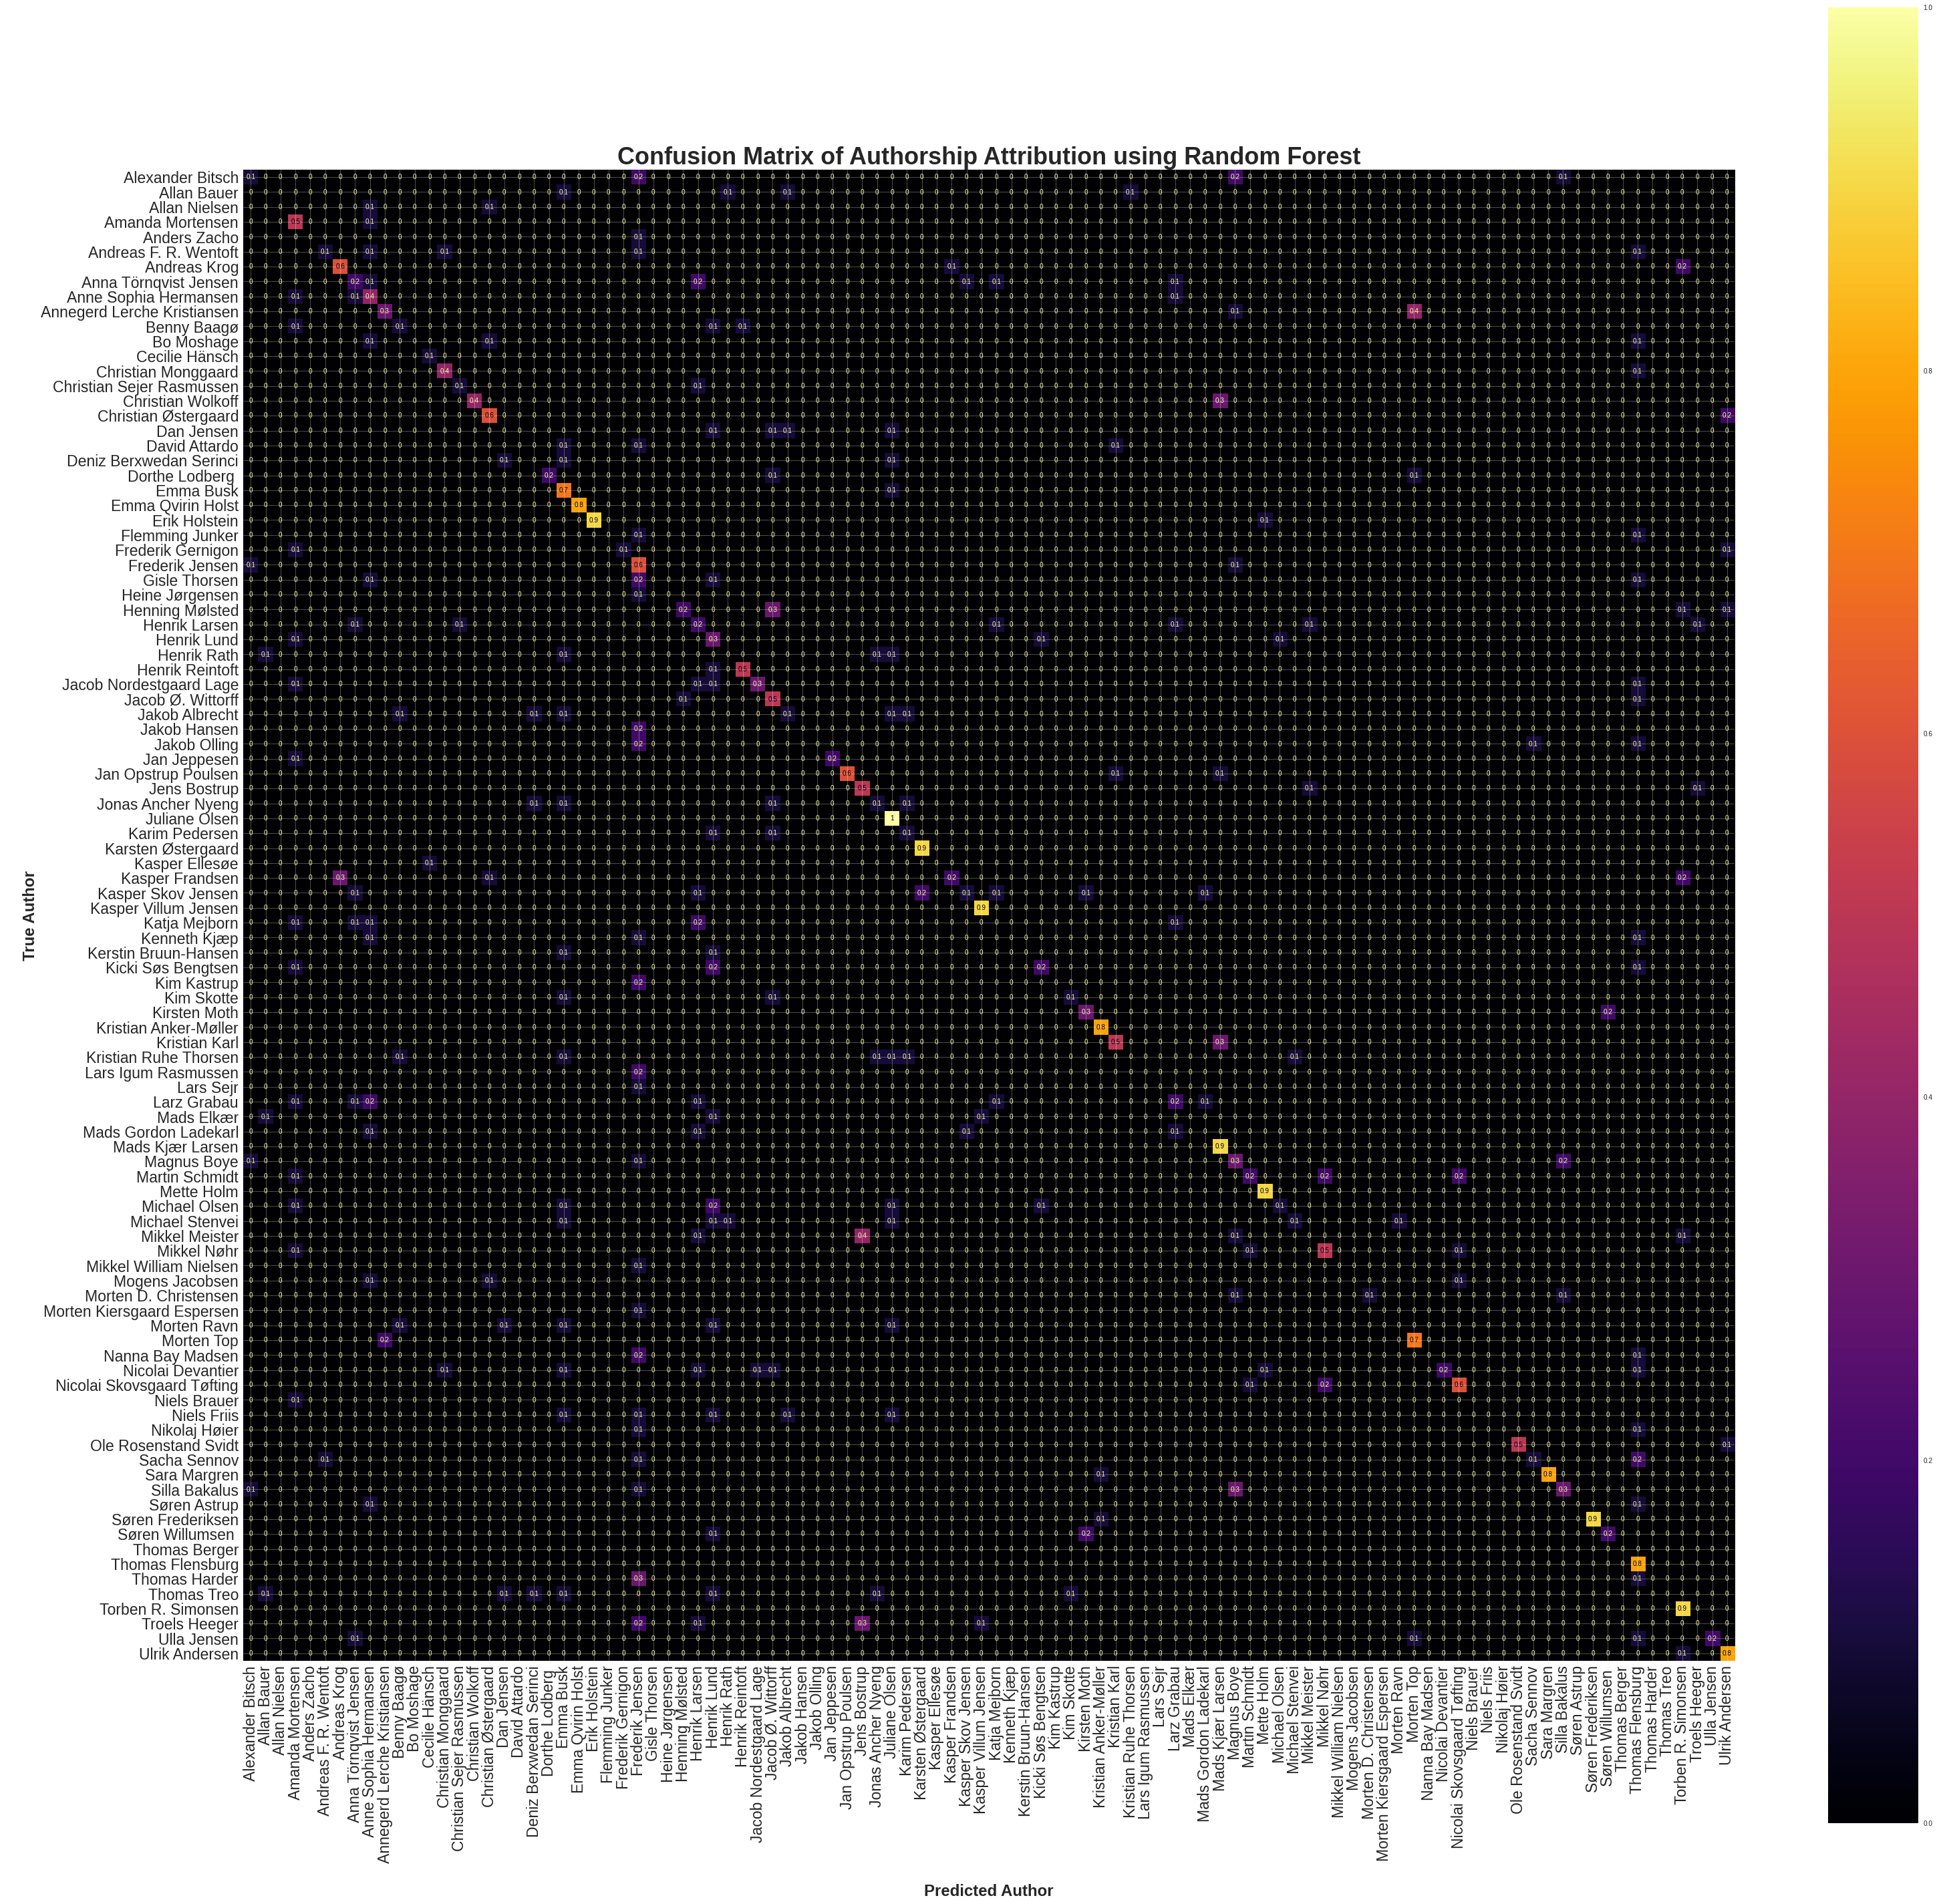

In [45]:
# Really big plot. See it here instead: https://kroglkt.github.io/articlencoding/
# fig, ax = plt.subplots(1, figsize=(50,50))
# format_cnf = format_cnf_matrix(outputs['cnf_matrix']).round(decimals=1)
# cnf = ConfusionMatrixDisplay(confusion_matrix=format_cnf, display_labels=a_labels)
# cnf.plot(ax=ax, xticks_rotation='vertical', cmap='inferno', )
# ax.grid(alpha=0.3)
# ax.set_xlabel('\nPredicted Author', fontweight='bold', fontsize=24);
# ax.set_ylabel('\nTrue Author', fontweight='bold', fontsize=24);
# ax.set_title("Confusion Matrix of Authorship Attribution using Random Forest", fontweight='bold', fontsize=36);
# ax.tick_params(axis='both', which='major', labelsize=23)
# plt.tight_layout()
# plt.savefig('figs/big_cnf_aa.png')

# PCA plot
See if the feature extractions look cool with PCA

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = np.load('Data/additional/xtra_features_domain_v2/trainX.npy', allow_pickle=True)[()]
y = np.load('Data/additional/xtra_features_domain_v2/trainY.npy', allow_pickle=True)[()]
X = X.toarray()
X = np.nan_to_num(X)

print("Scaling...")
stdscaler = StandardScaler()
X = stdscaler.fit_transform(X) 

print("Reducing...")
pca = PCA(n_components=3, svd_solver='randomized')
X = pca.fit_transform(X)
print("Alright B-)")

Scaling...
Reducing...
Alright B-)


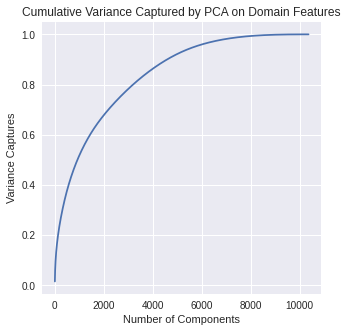

In [35]:
fig = plt.figure(figsize=(5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulative Variance Captured by PCA on Domain Features")
plt.xlabel("Number of Components")
plt.ylabel("Variance Captures")
plt.savefig('figs/small_pca_capture')

  0%|          | 0/3 [00:00<?, ?it/s]

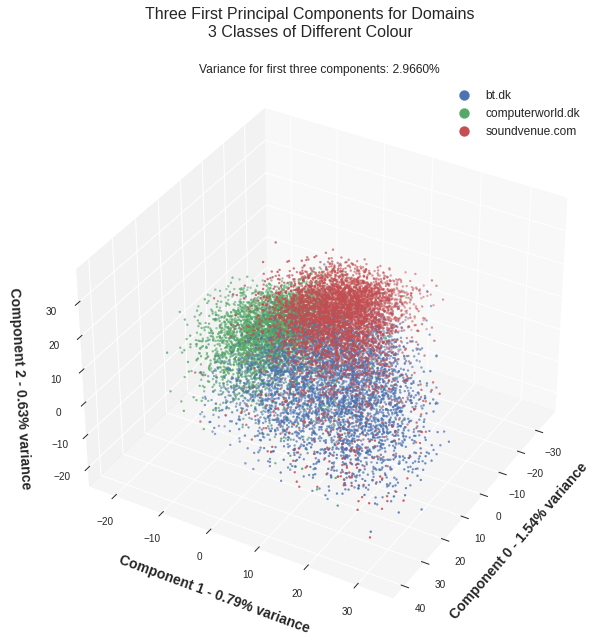

In [369]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")

for i in tqdm(['bt.dk', 'computerworld.dk', 'soundvenue.com']): #[0, 40, 22]
    ind = int(str2y[i])
    this_class = X[y==ind]
    
    x1 = [x[0] for x in this_class]
    y1 = [x[1] for x in this_class]
    z1 = [x[2] for x in this_class]
    
    ax.scatter3D(x1, y1, z1, s=4, label=i);
    
variances = pca.explained_variance_ratio_

ax.view_init(elev=35, azim=30)
plt.gca().patch.set_facecolor('white')
ax.set_xlabel(f'\nComponent 0 - {variances[0]*100:.2f}% variance', linespacing=3.2, fontweight='bold', fontsize=14)
ax.set_ylabel(f'\nComponent 1 - {variances[1]*100:.2f}% variance', linespacing=3.2, fontweight='bold', fontsize=14)
ax.set_zlabel(f'\nComponent 2 - {variances[2]*100:.2f}% variance', linespacing=3.2, fontweight='bold', fontsize=14)
plt.suptitle("Three First Principal Components for Domains\n3 Classes of Different Colour", fontsize=16)
plt.title(f"Variance for first three components: {sum(variances[:3])*100:.4f}%")
plt.legend(markerscale=5, fontsize=12)
plt.tight_layout()
plt.savefig('pca.png')

PCA only topics?

In [282]:
X = np.load('Data/additional/xtra_features_domain_v2/trainX.npy', allow_pickle=True)[()]
y = np.load('Data/additional/xtra_features_domain_v2/trainY.npy', allow_pickle=True)[()]
X = X.toarray()
X = np.nan_to_num(X)

feature_names = np.load('Data/additional/xtra_features_domain_v2/feature_names.npy', allow_pickle=True)

#feature_names[np.where(feature_names == 'topic 16')] = 'NOTHING'

topic_indices = [np.where(feature_names==x)[0][0] for x in feature_names if 'topic' in x]

only_topics = X[:, topic_indices]

stdscaler = StandardScaler()
X = stdscaler.fit_transform(only_topics) 
print("Scaled to the max!")

pca = PCA(n_components=10)
pca.fit(only_topics)
pca_topics = pca.transform(only_topics)

Scaled to the max!


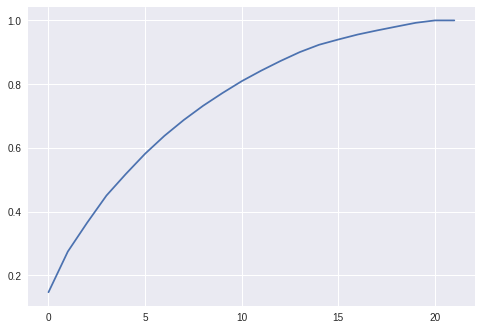

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [229]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, learning_rate='auto', random_state=42, n_jobs=-1)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 94572 samples in 0.005s...
[t-SNE] Computed neighbors for 94572 samples in 3.728s...
[t-SNE] Computed conditional probabilities for sample 1000 / 94572
[t-SNE] Computed conditional probabilities for sample 2000 / 94572
[t-SNE] Computed conditional probabilities for sample 3000 / 94572
[t-SNE] Computed conditional probabilities for sample 4000 / 94572
[t-SNE] Computed conditional probabilities for sample 5000 / 94572
[t-SNE] Computed conditional probabilities for sample 6000 / 94572
[t-SNE] Computed conditional probabilities for sample 7000 / 94572
[t-SNE] Computed conditional probabilities for sample 8000 / 94572
[t-SNE] Computed conditional probabilities for sample 9000 / 94572
[t-SNE] Computed conditional probabilities for sample 10000 / 94572
[t-SNE] Computed conditional probabilities for sample 11000 / 94572
[t-SNE] Computed conditional probabilities for sample 12000 / 94572
[t-SNE] Computed conditional probabilities for sam

In [230]:
str2y

{'politiken.dk': '25',
 'pov.international': '26',
 'samvirke.dk': '27',
 'seoghoer.dk': '28',
 'sn.dk': '29',
 'journalisten.dk': '20',
 'altinget.dk': '0',
 'berlingske.dk': '1',
 'information.dk': '17',
 'ing.dk': '18',
 'finans.dk': '11',
 'finanswatch.dk': '12',
 'fodevarewatch.dk': '13',
 'fyens.dk': '14',
 'jyllands-posten.dk': '22',
 'motormagasinet.dk': '23',
 'nordjyske.dk': '24',
 'soundvenue.com': '30',
 'stiften.dk': '31',
 'tv2east.dk': '33',
 'version2.dk': '34',
 'ejendomswatch.dk': '7',
 'ekkofilm.dk': '8',
 'ekstrabladet.dk': '9',
 'bt.dk': '4',
 'computerworld.dk': '5',
 'tv2.dk': '32',
 'gaffa.dk': '15',
 'jv.dk': '21',
 'helsingordagblad.dk': '16',
 'dr.dk': '6',
 'billedbladet.dk': '2',
 'borsen.dk': '3',
 'fagbladet3f.dk': '10',
 'jiyan.dk': '19'}

In [231]:
cluster_circles = {
    'unk0' : [(145,220), (50)], #dr, tv2
    'unk1' : [(350,380), (50)], #ekkofilm
    'unk3' : [(340,100), (50)], #version2
    'unk4' : [(190,350), (50)], #gaffa
    'unk5' : [(560,100), (50)], #finans
}

  0%|          | 0/10 [00:00<?, ?it/s]

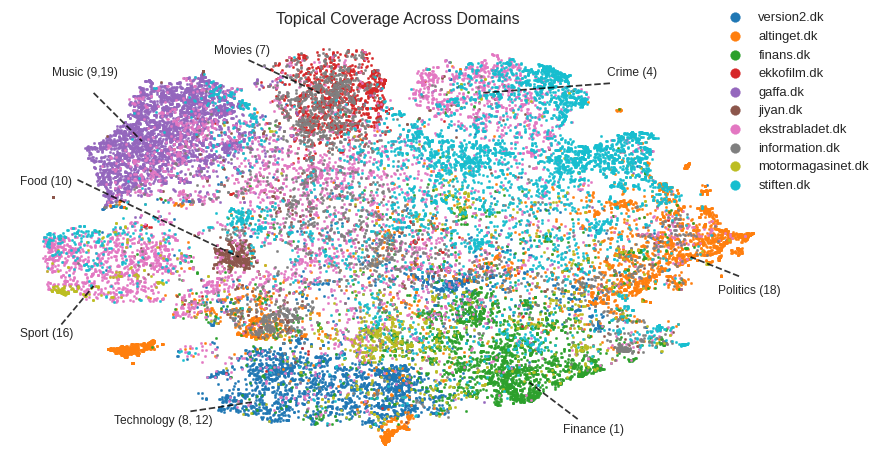

In [379]:
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
#['version2.dk', 'altinget.dk', 'finans.dk', 'ekkofilm.dk', 'gaffa.dk', 'jiyan.dk']

domain_list = ['version2.dk', 'altinget.dk', 'finans.dk', 'ekkofilm.dk', 'gaffa.dk', 'jiyan.dk', 
               'ekstrabladet.dk', 'information.dk', 'motormagasinet.dk', 'stiften.dk']

mainstream_domains = ['dr.dk', 'tv2.dk', 'politiken.dk', 'berlingske.dk', 'jyllands-posten.dk', 'pov.international']
tabloids = ['bt.dk', 'ekstrabladet.dk', 'seoghoer.dk', 'billedbladet.dk']
local_domains = ['sn.dk', 'fyens.dk', 'nordjyske.dk', 'helsingordagblad.dk', 'jv.dk', 'tv2east.dk', 'stiften.dk']
niche_domains = ['information.dk', 'computerworld.dk', 'ekkofilm.dk', 'borsen.dk', 'gaffa.dk', 'samvirke.dk', 'jiyan.dk', 'fagbladet3f.dk', 'ing.dk', 'altinget.dk']

NUM_COLORS = len(domain_list)
cm = ListedColormap(sns.color_palette('tab10').as_hex())

fig, ax = plt.subplots(1, figsize=(14,8))
ax.set_prop_cycle('color', [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])


for i in tqdm(domain_list):
    
    label = str2y[i]
    this_class = tsne_results[y==int(label)]
    
    x1 = [x[0] for x in this_class]
    y1 = [x[1] for x in this_class]
    
    ax.scatter(x1, y1, s=6, label=i)

plt.text(0.1, 0.9, "Music (9,19)", horizontalalignment='center',verticalalignment='center', transform=ax.transAxes, fontsize=12)
plt.plot([-90, -75],[75,50], '--', c='k', alpha=0.8)

plt.text(0.3, 0.95, "Movies (7)", horizontalalignment='center',verticalalignment='center', transform=ax.transAxes, fontsize=12)
plt.plot([-42, -20],[92,75], '--', c='k', alpha=0.8)

plt.text(0.2, 0.1, "Technology (8, 12)", horizontalalignment='center',verticalalignment='center', transform=ax.transAxes, fontsize=12)
plt.plot([-60, -40],[-90,-85], '--', c='k', alpha=0.8)

plt.text(0.05, 0.3, "Sport (16)", horizontalalignment='center',verticalalignment='center', transform=ax.transAxes, fontsize=12)
plt.plot([-100, -90],[-45,-25], '--', c='k', alpha=0.8)

plt.text(0.75, 0.08, "Finance (1)", horizontalalignment='center',verticalalignment='center', transform=ax.transAxes, fontsize=12)
plt.plot([60, 45],[-94,-75], '--', c='k', alpha=0.8)

plt.text(0.95, 0.4, "Politics (18)", horizontalalignment='center',verticalalignment='center', transform=ax.transAxes, fontsize=12)
plt.plot([110, 95],[-20,-10], '--', c='k', alpha=0.8)

plt.text(0.05, 0.65, "Food (10)", horizontalalignment='center',verticalalignment='center', transform=ax.transAxes, fontsize=12)
plt.plot([-95, -45],[30,-10], '--', c='k', alpha=0.8)

plt.text(0.80, 0.9, "Crime (4)", horizontalalignment='center',verticalalignment='center', transform=ax.transAxes, fontsize=12)
plt.plot([70, 30],[80,75], '--', c='k', alpha=0.8)

ax.legend(bbox_to_anchor=(0.9, 0.6), markerscale=4, fontsize=13)
plt.title("Topical Coverage Across Domains", fontsize=16)
plt.xticks(visible=False)
plt.yticks(visible=False)
ax.grid(False)
ax.set_facecolor('white')
plt.tight_layout()
plt.savefig('tsne.png')

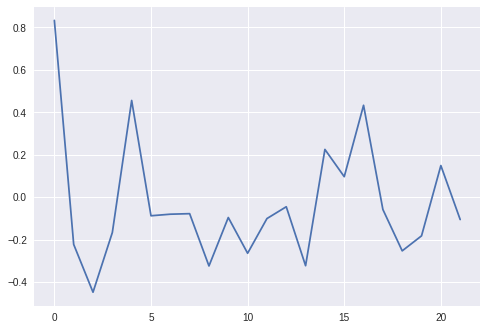

In [352]:
plt.plot(X[y==int(str2y['ekstrabladet.dk'])].mean(axis=0))

# ROC curves
The easy part

In [3]:
with open('Classification results/Random_Forest/xtra_NA_manual_RF_classsification.dat', 'rb') as f:
    domain_rf_output = pickle.load(f)

with open('Classification results/Logistic_Regression/xtra_NA_manual_LR_classsification.dat', 'rb') as f:
    domain_lr_output = pickle.load(f)
    
with open('Classification results/Random_Forest/xtra_NA_auto_RF_classsification.dat', 'rb') as f:
    auto_domain_rf_output = pickle.load(f)

with open('Classification results/Logistic_Regression/xtra_NA_auto_LR_classsification.dat', 'rb') as f:
    auto_domain_lr_output = pickle.load(f)

with open('Classification results/Random_Forest/xtra_NA_combined_RF_classsification.dat', 'rb') as f:
    comb_domain_rf_output = pickle.load(f)

with open('Classification results/Logistic_Regression/xtra_NA_combined_LR_classsification.dat', 'rb') as f:
    comb_domain_lr_output = pickle.load(f)
    
# Authorship attribution
print("Domains loaded")
    
with open('Classification results/Random_Forest/xtra_AA_manual_RF_classsification.dat', 'rb') as f:
    author_rf_output = pickle.load(f)

with open('Classification results/Logistic_Regression/xtra_AA_manual_LR_classsification.dat', 'rb') as f:
    author_lr_output = pickle.load(f)
    
with open('Classification results/Random_Forest/xtra_AA_auto_RF_classsification.dat', 'rb') as f:
    auto_author_rf_output = pickle.load(f)

with open('Classification results/Logistic_Regression/xtra_AA_auto_LR_classsification.dat', 'rb') as f:
    auto_author_lr_output = pickle.load(f)

with open('Classification results/Random_Forest/xtra_AA_combined_RF_classsification.dat', 'rb') as f:
    comb_author_rf_output = pickle.load(f)

with open('Classification results/Logistic_Regression/xtra_AA_combined_LR_classsification.dat', 'rb') as f:
    comb_author_lr_output = pickle.load(f)

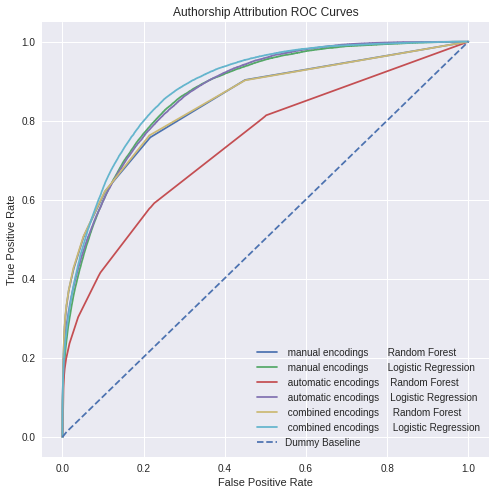

In [4]:
def create_roc(output_rf, output_lr, auto_rf, auto_lr, comb_rf, comb_lr, title):
    fig, ax = plt.subplots(1, figsize=(8,8))
    label1 = output_rf['name'].split(',')[2]+"\t"+output_rf['name'].split(',')[0]
    label2 = output_lr['name'].split(',')[2]+"\t"+output_lr['name'].split(',')[0]
    label3 = auto_rf['name'].split(',')[2]+"\t"+auto_rf['name'].split(',')[0]
    label4 = auto_lr['name'].split(',')[2]+"\t"+auto_lr['name'].split(',')[0]
    label5 = comb_rf['name'].split(',')[2]+"\t"+comb_rf['name'].split(',')[0]
    label6 = comb_lr['name'].split(',')[2]+"\t"+comb_lr['name'].split(',')[0]
    
    plt.plot(output_rf['fpr'], output_rf['tpr'], label=label1.expandtabs())
    plt.plot(output_lr['fpr'], output_lr['tpr'], label=label2.expandtabs())
    
    plt.plot(auto_rf['fpr'], auto_rf['tpr'], label=label3.expandtabs())
    plt.plot(auto_lr['fpr'], auto_lr['tpr'], label=label4.expandtabs())
    
    plt.plot(comb_rf['fpr'], comb_rf['tpr'], label=label5.expandtabs())
    plt.plot(comb_lr['fpr'], comb_lr['tpr'], label=label6.expandtabs())
    
    plt.plot(output_rf['dum_fpr'], output_rf['dum_tpr'], '--', label="Dummy Baseline")
    plt.legend()
    plt.title(title)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

create_roc(author_rf_output, author_lr_output, auto_author_rf_output, auto_author_lr_output, 
           comb_author_rf_output, comb_author_lr_output, "Authorship Attribution ROC Curves")
plt.savefig('figs/roc_author.png')

In [12]:
aa_outputs = [author_rf_output, author_lr_output, auto_author_rf_output, auto_author_lr_output, comb_author_rf_output, comb_author_lr_output]
na_outputs = [domain_rf_output, domain_lr_output, auto_domain_rf_output, auto_domain_lr_output, comb_domain_rf_output, comb_domain_lr_output]


for i in aa_outputs:
    print(i['name']+'\t\t'+str(i['metrics']['top5_accuracy']))

# print()
# for i in aa_outputs:
#     print('DUMMY:'+str(i['dum_metrics']['f1']))

print()
print('Domains')
print()
for i in na_outputs:
    print(i['name']+'\t\t'+str(i['metrics']['top5_accuracy']))

# print()
# for i in na_outputs:
#     print('DUMMY:'+str(i['dum_metrics']['f1']))

Random Forest, Authorship Attribution, manual encodings		0.4760549602027658
Logistic Regression, Authorship Attribution, manual encodings		0.4417270665658766
Random Forest, Authorship Attribution, automatic encodings		0.31584330116946063
Logistic Regression, Authorship Attribution, automatic encodings		0.4363466583663124
Random Forest, authorship attribution, combined encodings		0.4764551558539731
Logistic Regression, authorship attribution, combined encodings		0.46698385877540133

Domains

Random Forest, Newspaper Attribution, manual encodings		0.9377431906614786
Logistic Regression, newspaper attribution, manual encodings		0.9591862628996786
Random Forest, Newspaper Attribution, automatic encodings		0.8073929961089494
Logistic Regression, Newspaper Attribution, automatic encodings		0.9327102013195737
Random Forest, newspaper attribution, combined encodings		0.9464557604466249
Logistic Regression, Newspaper Attribution, combined encodings		0.9717475892403993


In [105]:
domain_rf_output['metrics'].keys()

dict_keys(['correct', 'accuracy', 'bal_accuracy', 'f1', 'auc', 'top5_accuracy', 'cohen'])

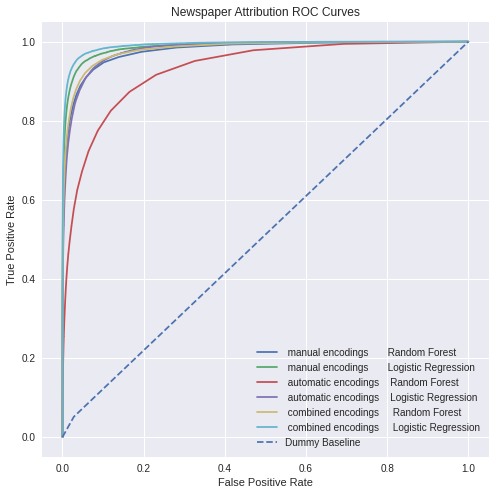

In [101]:
create_roc(domain_rf_output, domain_lr_output, auto_domain_rf_output, auto_domain_lr_output, 
           comb_domain_rf_output, comb_domain_lr_output, "Newspaper Attribution ROC Curves")
plt.savefig('figs/roc_domain.png')

## Loss plot
Is this loss?

In [9]:
with open('data/additional/log.txt', 'r', encoding='utf-8') as f:
    log = f.readlines()

log = [x for x in log if 'epoch' in x]
epochs = [x.split(',')[0][6:] for x in log]
loss = [x.split('loss')[1].replace('\'','').replace(' ','').replace('}','').replace('\n', '').replace(':','').replace(',','').strip() for x in log]
loss_val = [x.split('loss_val')[1].replace('\'','').replace(' ','').replace('}','').replace('\n', '').replace(':','').replace(',','').strip() for x in log[5:]]

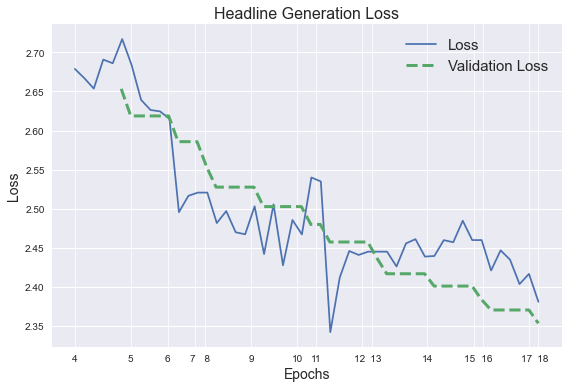

In [89]:
fig, ax = plt.subplots()

plt.plot(np.linspace(0,50,50), [float(x) for x in loss], label="Loss", zorder=10)
plt.plot(np.linspace(5,50,45), [float(x) for x in loss_val], '--', label="Validation Loss", linewidth=3, zorder=10)
plt.legend(prop={'size':15})
plt.title("Headline Generation Loss", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)
l = [float(x) for x in loss]

ax.axvline(0, color='white', linewidth=.8) #0-1
ax.axvline(6, color='white', linewidth=.8) #1-2
ax.axvline(10, color='white', linewidth=.8) #2-3
ax.axvline(13, color='white', linewidth=.8) #3-4
ax.axvline(14, color='white', linewidth=.8) #4-5
ax.axvline(19, color='white', linewidth=.8) #5-6
ax.axvline(24, color='white', linewidth=.8) #6-7
ax.axvline(26, color='white', linewidth=.8) #7-8
ax.axvline(31, color='white', linewidth=.8) #8-9
ax.axvline(32, color='white', linewidth=.8) #9-10
ax.axvline(38, color='white', linewidth=.8) #10-11
ax.axvline(43, color='white', linewidth=.8) #11-12
ax.axvline(44, color='white', linewidth=.8) #12-13
ax.axvline(49, color='white', linewidth=.8) #13-14
ax.axvline(50, color='white', linewidth=.8) #15

ax.set_xticks([0,6,10,13,14,19,24,26,31,32,38,43,44,49,50])
ax.set_xticklabels(['4','5','6','7  ','  8','9','10','11','12  ','   13','14','15   ','   16','17  ','   18'])

ax.xaxis.grid(False)
plt.tight_layout()
#plt.savefig('figs/loss.png')

In [25]:
len(epochs)

50

# TEsTing plEAsE IgnOrE

In [25]:
from sklearn.decomposition import TruncatedSVD, IncrementalPCA
X = np.load('Data/additional/xtra_features_domain_v2/testX.npy', allow_pickle=True)[()]
y = np.load('Data/additional/xtra_features_domain_v2/testY.npy', allow_pickle=True)
type(X)

scipy.sparse._coo.coo_matrix

In [21]:
svd = TruncatedSVD(n_components=100, n_iter=10, random_state=42)
svd_X = svd.fit_transform(X)

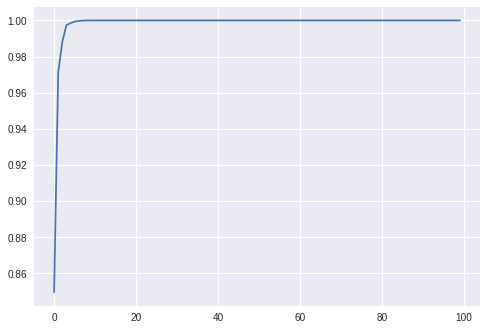

In [22]:
plt.plot(np.cumsum(svd.explained_variance_ratio_))

In [ ]:
plt.plot(np.cumsum(icpa.explained_variance_ratio_))

Create a bunch of confusion matrices..

In [48]:
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay

def format_cnf_matrix(cnf_matrix):
    cnf_matrix = cnf_matrix / cnf_matrix.astype(np.float).sum(axis=1)
    return cnf_matrix

def make_cnf_mat(outputs, task, model, feature_space):
    fig, ax = plt.subplots(1, figsize=(20,20))
    format_cnf = format_cnf_matrix(outputs['cnf_matrix']).round(decimals=1)
    cnf = ConfusionMatrixDisplay(confusion_matrix=format_cnf, display_labels=labels)
    cnf.plot(ax=ax, xticks_rotation='vertical', cmap='inferno', colorbar=False)
    ax.grid(alpha=0.1)
    ax.set_xlabel(f'\nPredicted {task}', fontweight='bold', fontsize=14);
    ax.set_ylabel(f'\nTrue {task}', fontweight='bold', fontsize=14);
    ax.set_title(f"Confusion Matrix of {task} Classification using {model}\nFeatures: {feature_space}", fontweight='bold', fontsize=16);
    ax.tick_params(axis='both', which='major', labelsize=13)
    plt.tight_layout()
    plt.savefig(f"figs/cnf/{feature_space}_{task}_{model.replace(' ','')}.png")

ValueError: The number of FixedLocator locations (100), usually from a call to set_ticks, does not match the number of ticklabels (35).

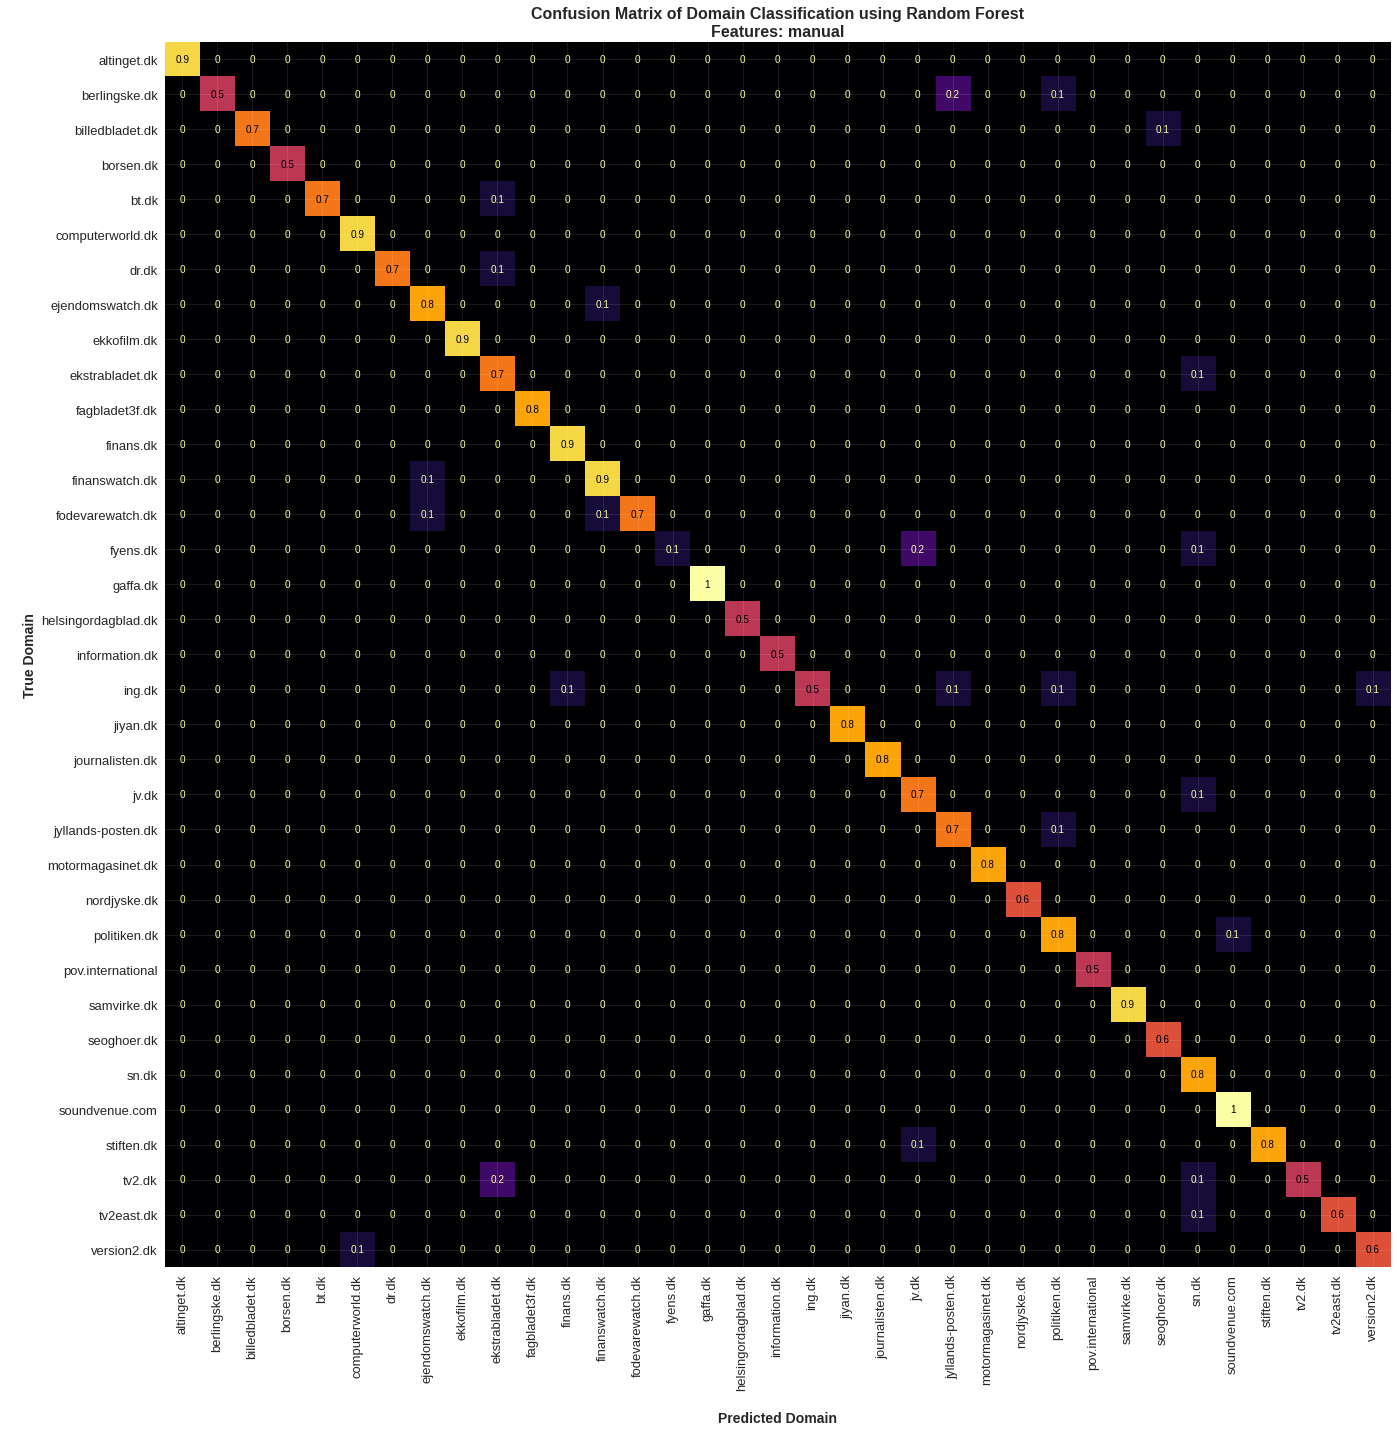

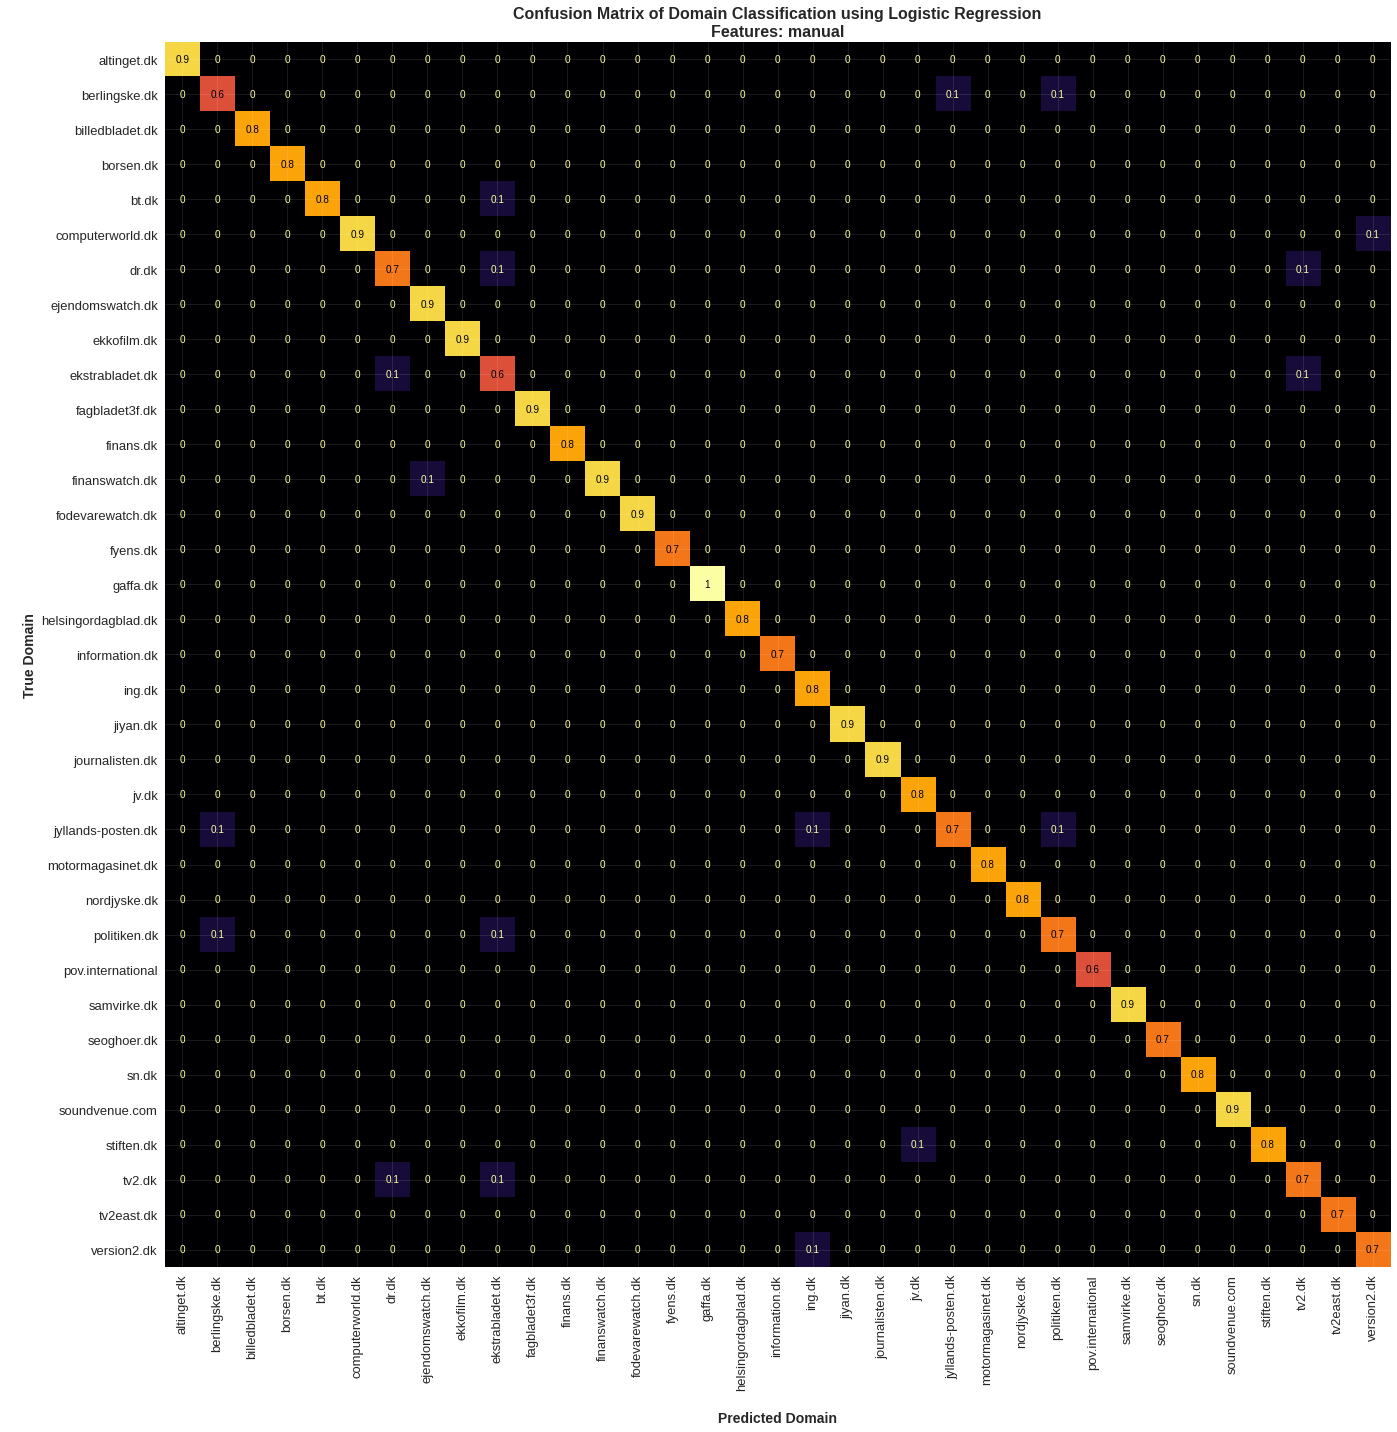

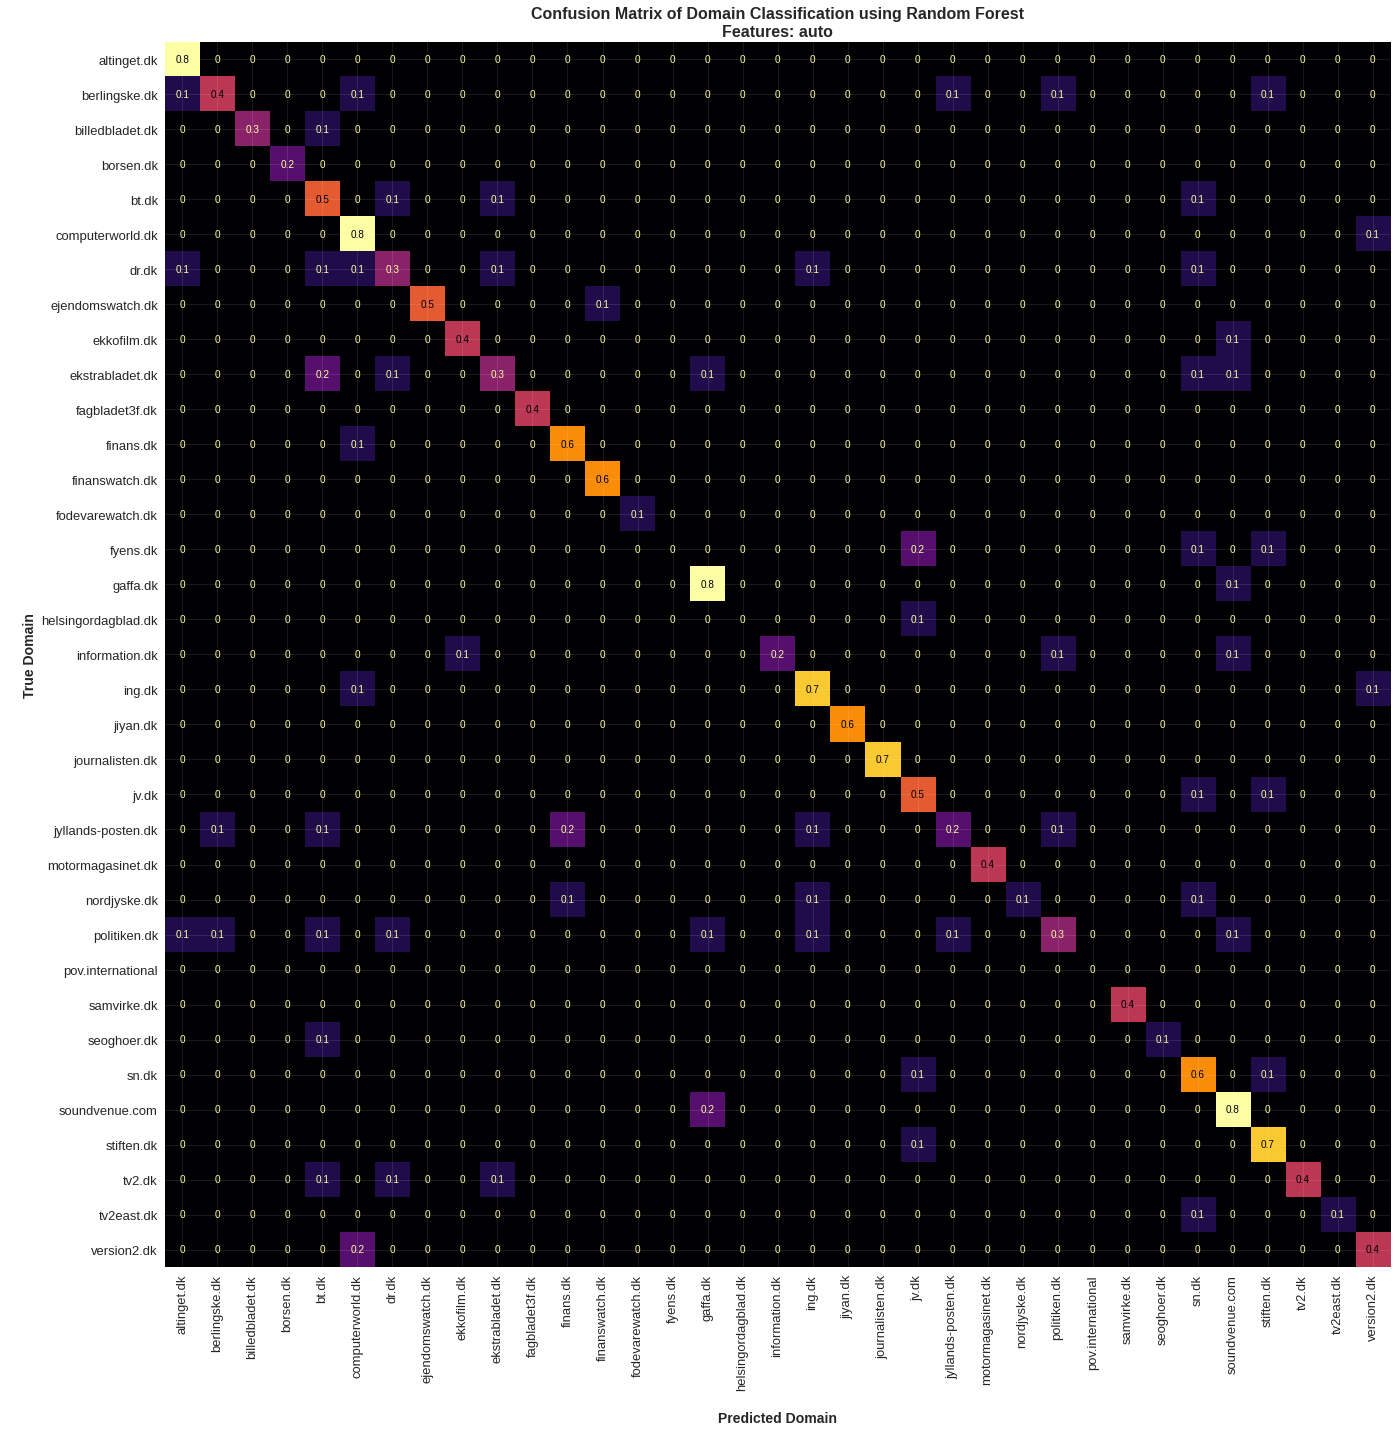

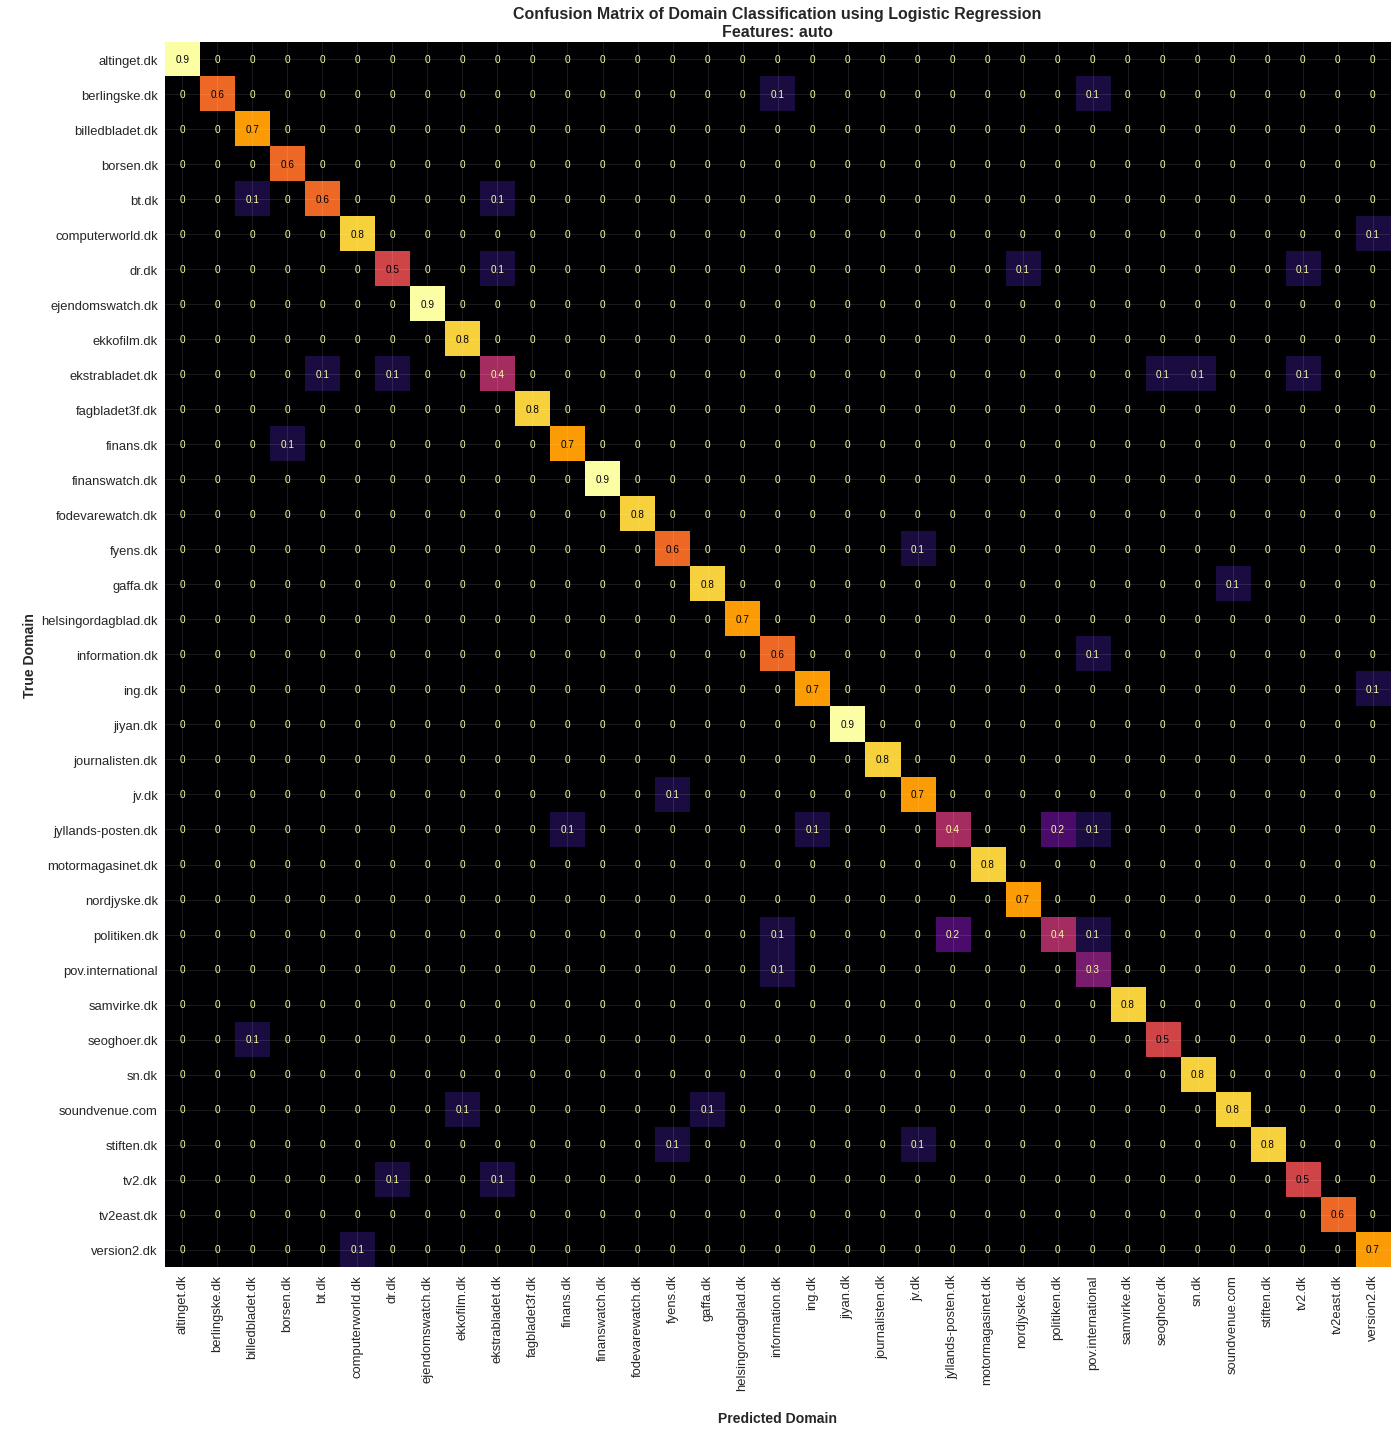

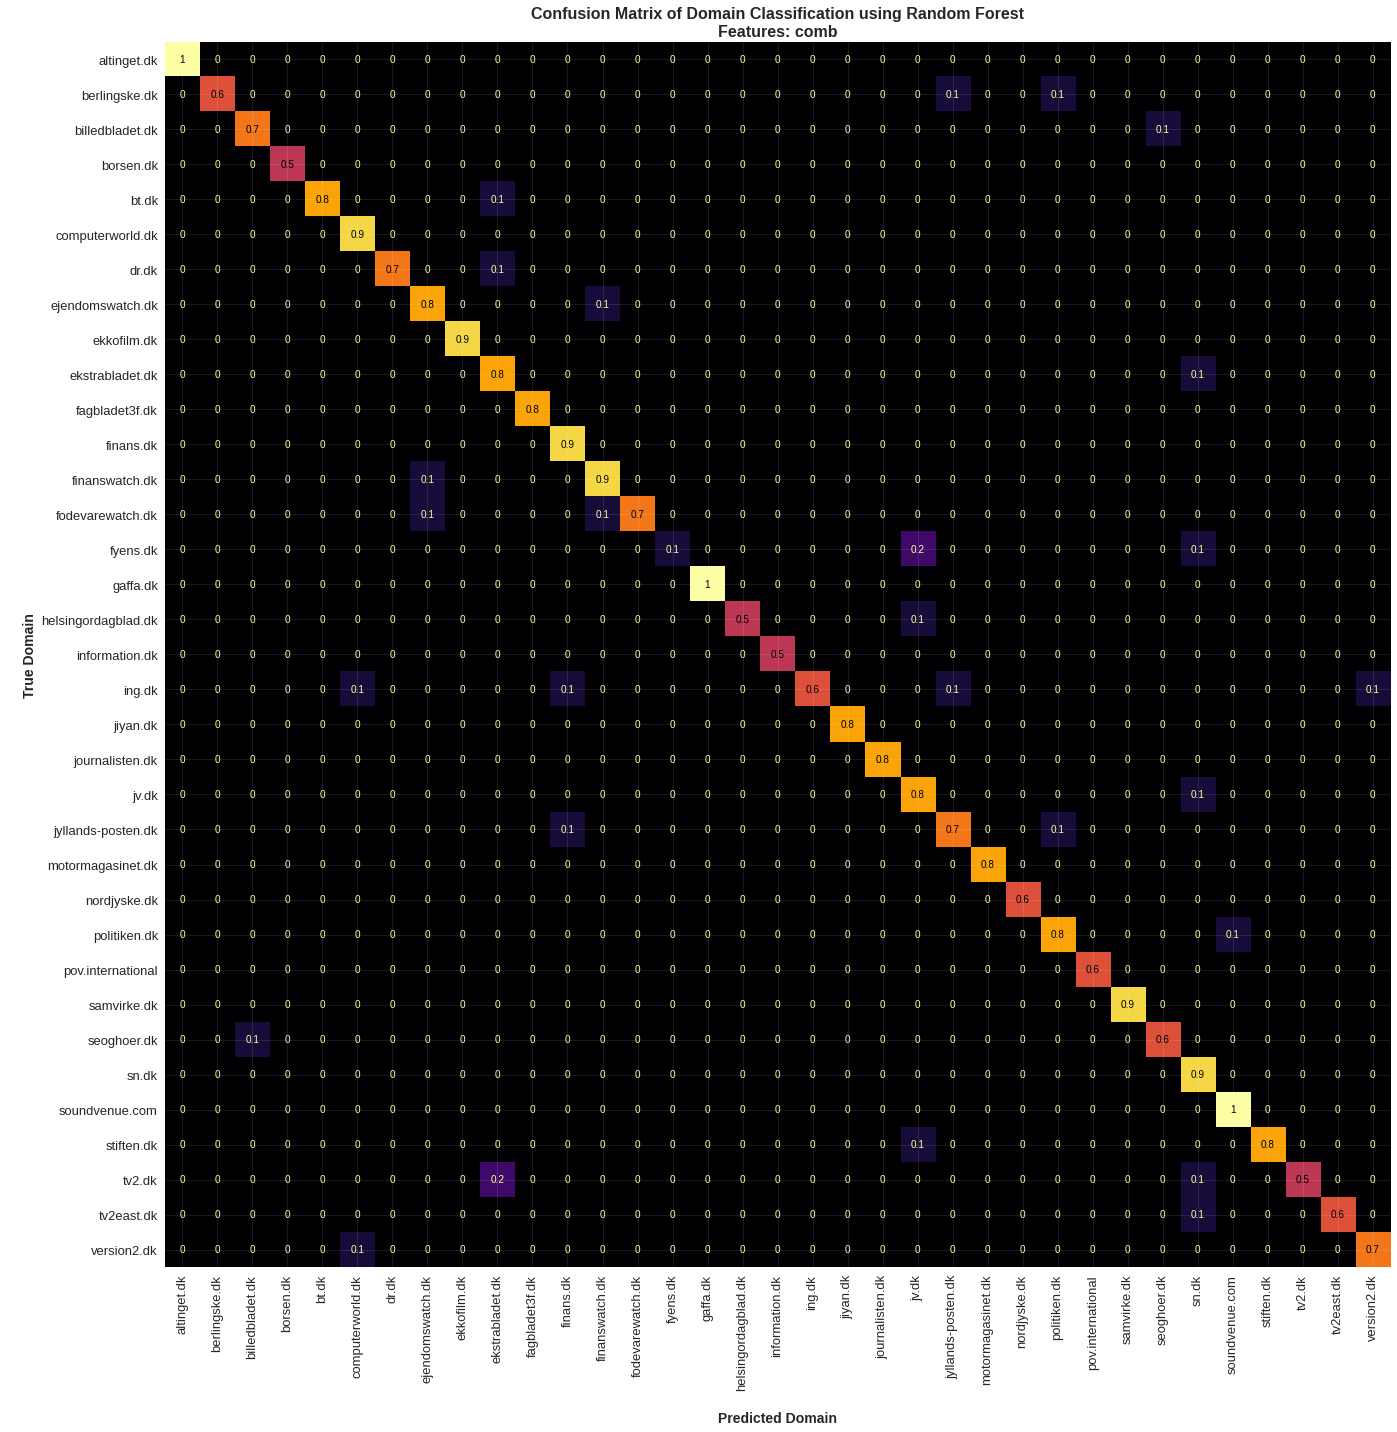

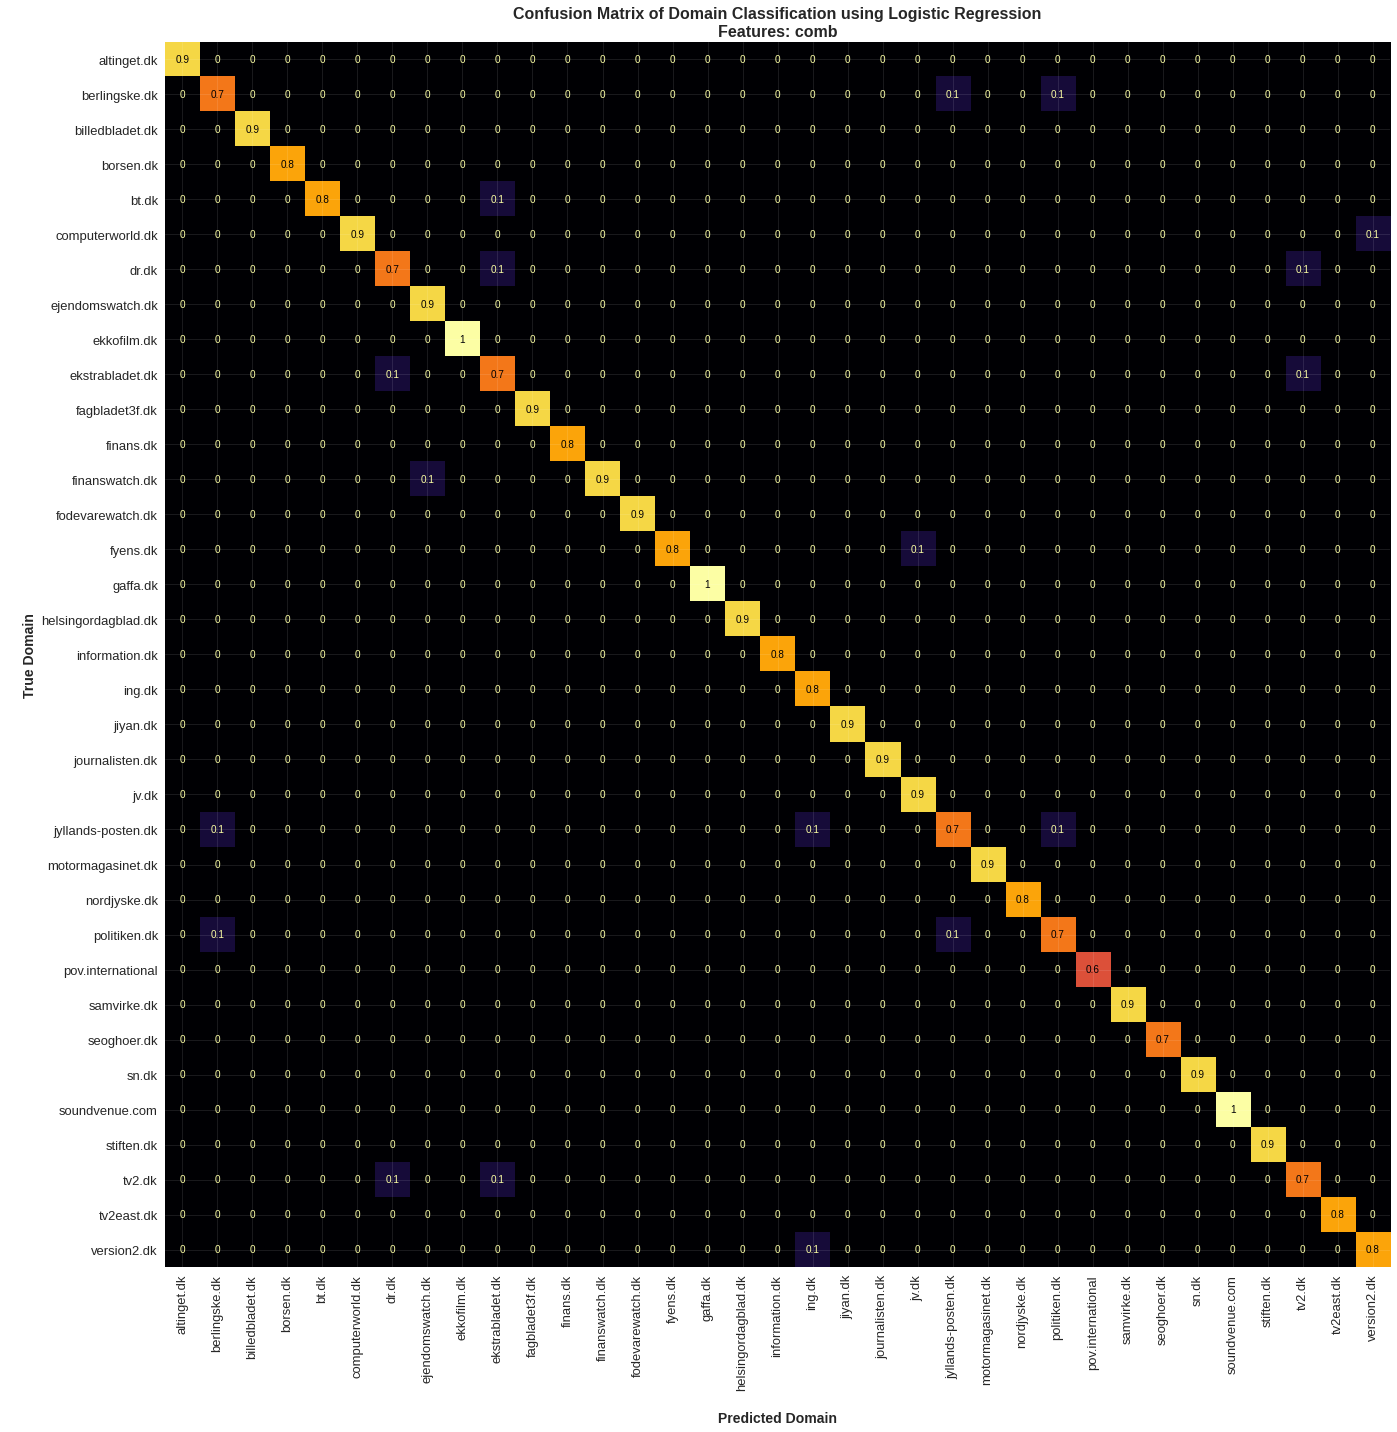

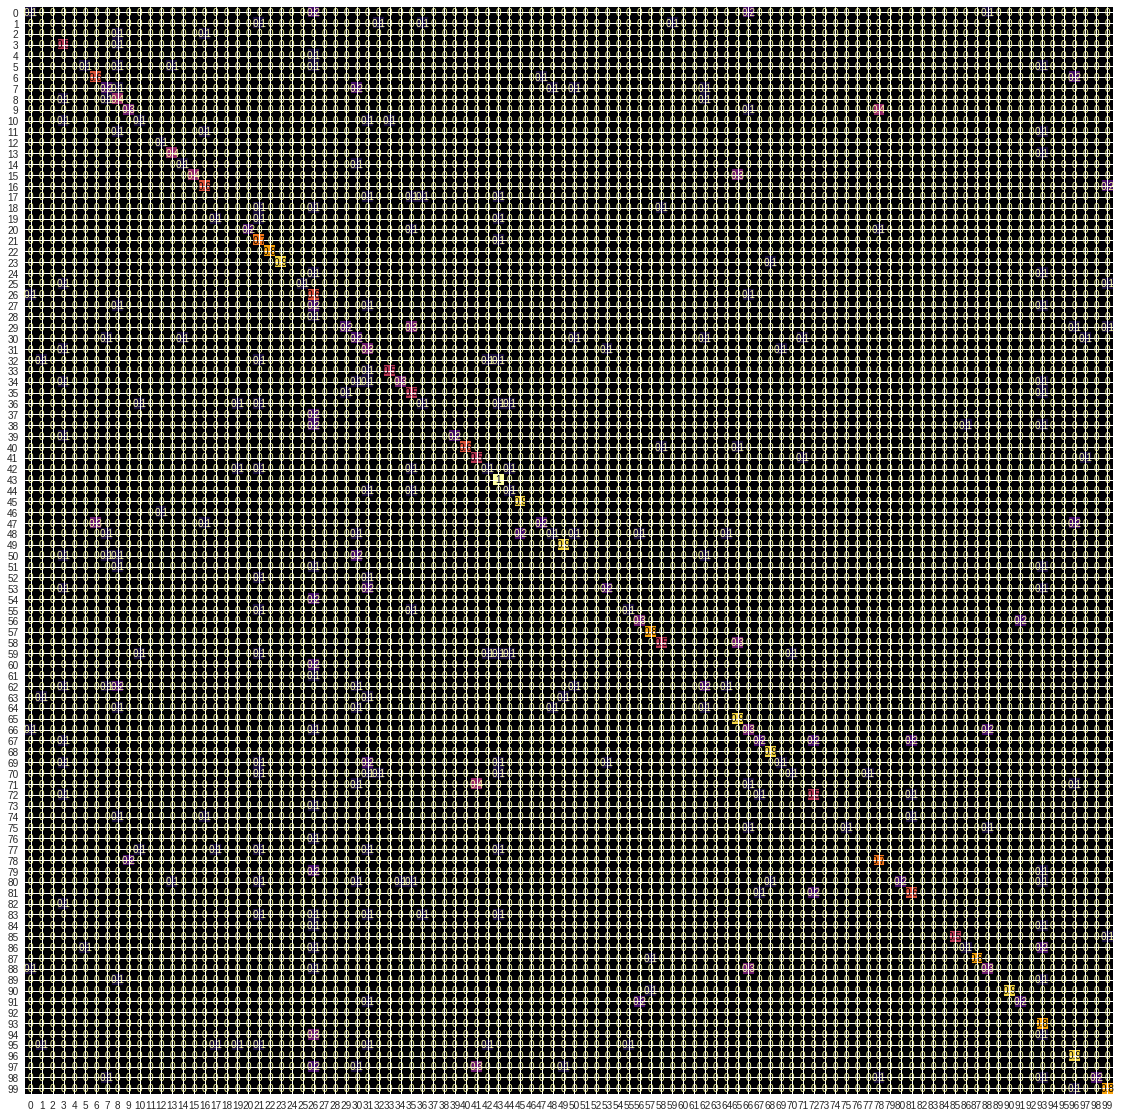

In [49]:
with open('Classification results/Random_Forest/xtra_NA_manual_RF_classsification.dat', 'rb') as f:
    domain_rf_output = pickle.load(f)
    make_cnf_mat(domain_rf_output, 'Domain', 'Random Forest', 'manual')

with open('Classification results/Logistic_Regression/xtra_NA_manual_LR_classsification.dat', 'rb') as f:
    domain_lr_output = pickle.load(f)
    make_cnf_mat(domain_lr_output, 'Domain', 'Logistic Regression', 'manual')
    
with open('Classification results/Random_Forest/xtra_NA_auto_RF_classsification.dat', 'rb') as f:
    auto_domain_rf_output = pickle.load(f)
    make_cnf_mat(auto_domain_rf_output, 'Domain', 'Random Forest', 'auto')

with open('Classification results/Logistic_Regression/xtra_NA_auto_LR_classsification.dat', 'rb') as f:
    auto_domain_lr_output = pickle.load(f)
    make_cnf_mat(auto_domain_lr_output, 'Domain', 'Logistic Regression', 'auto')

with open('Classification results/Random_Forest/xtra_NA_combined_RF_classsification.dat', 'rb') as f:
    comb_domain_rf_output = pickle.load(f)
    make_cnf_mat(comb_domain_rf_output, 'Domain', 'Random Forest', 'comb')

with open('Classification results/Logistic_Regression/xtra_NA_combined_LR_classsification.dat', 'rb') as f:
    comb_domain_lr_output = pickle.load(f)
    make_cnf_mat(comb_domain_lr_output, 'Domain', 'Logistic Regression', 'comb')
    
# # Authorship attribution --- TOO BIG!!
# with open('Classification results/Random_Forest/xtra_AA_manual_RF_classsification.dat', 'rb') as f:
#     author_rf_output = pickle.load(f)
#     make_cnf_mat(author_rf_output, 'Author', 'Random Forest', 'manual')

# with open('Classification results/Logistic_Regression/xtra_AA_manual_LR_classsification.dat', 'rb') as f:
#     author_lr_output = pickle.load(f)
#     make_cnf_mat(author_lr_output, 'Author', 'Logistic Regression', 'manual')
    
# with open('Classification results/Random_Forest/xtra_AA_auto_RF_classsification.dat', 'rb') as f:
#     auto_author_rf_output = pickle.load(f)
#     make_cnf_mat(auto_author_rf_output, 'Author', 'Random Forest', 'auto')

# with open('Classification results/Logistic_Regression/xtra_AA_auto_LR_classsification.dat', 'rb') as f:
#     auto_author_lr_output = pickle.load(f)
#     make_cnf_mat(auto_author_lr_output, 'Author', 'Logistic Regression', 'auto')

# with open('Classification results/Random_Forest/xtra_AA_combined_RF_classsification.dat', 'rb') as f:
#     comb_author_rf_output = pickle.load(f)
#     make_cnf_mat(comb_author_rf_output, 'Author', 'Random Forest', 'comb')

# with open('Classification results/Logistic_Regression/xtra_AA_combined_LR_classsification.dat', 'rb') as f:
#     comb_author_lr_output = pickle.load(f)
#     make_cnf_mat(comb_author_lr_output, 'Author', 'Logistic Regression', 'comb')

In [26]:
dx = np.load('Data/additional/xtra_features_domain_v2/testX.npy', allow_pickle=True)[()]
ax = np.load('Data/additional/xtra_features_author_v2/testX.npy', allow_pickle=True)[()]

dx.data = np.nan_to_num(dx.data)
ax.data = np.nan_to_num(ax.data)

ax = ax.toarray()
dx = dx.toarray() 

Text(0, 0.5, 'Probability Density')

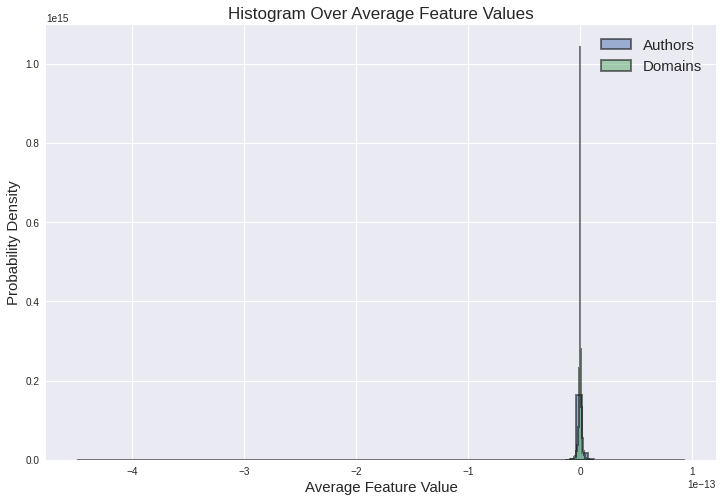

In [82]:
fig, axx = plt.subplots(1, figsize=(12,8))
plt.hist(ax.mean(axis=0), bins=100, density=True, alpha=0.5, histtype='stepfilled', edgecolor='k', linewidth=2, label="Authors");
plt.hist(dx.mean(axis=0), bins=100, density=True, alpha=0.5, histtype='stepfilled', edgecolor='k', linewidth=2, label="Domains");
plt.legend(prop={'size':15})
plt.title("Histogram Over Average Feature Values", fontsize=17)
plt.xlabel("Average Feature Value", fontsize=15)
plt.ylabel("Probability Density", fontsize=15)

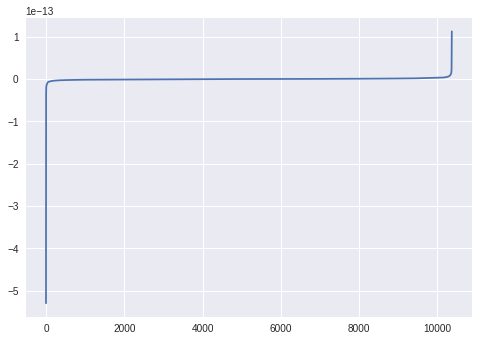

In [80]:
plt.plot(sorted(dx.mean(axis=0)))
#plt.plot(sorted(ax.mean(axis=0)))

In [81]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
dx = std.fit_transform(dx)
ax = std.fit_transform(ax)

In [89]:
train_y = np.load('Data/additional/xtra_features_header_v2/trainY.npy', allow_pickle=True)
test_y = np.load('Data/additional/xtra_features_header_v2/testY.npy', allow_pickle=True)

In [85]:
import pickle
with open('Data/additional/xtra_features_header_v2/index_to_label.dat', 'rb') as f:
    y2str = pickle.load(f)

In [92]:
train_headers = [y2str[str(x)] for x in train_y]

In [93]:
train_headers[0]

'Jubler over dansk trøffelfund: Tre gange større end dem i bøgerne - TV 2'

In [94]:
train_y[0]

97571

In [96]:
y2str["97571"]

'Jubler over dansk trøffelfund: Tre gange større end dem i bøgerne - TV 2'